In [1]:
import matplotlib as mpl

new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'
                }

mpl.rcParams.update(new_rc_params)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from joblib import Parallel, delayed
import seaborn as sns

import pre_functions_clean as pf
import time_constant_shuffle_FLN as tc
import Time_Constant_Plot as TCP

# Read Network Data
MACAQUE_CASE=0
CONSENSUS_CASE=0
datafile='subgraph_data_marmoset.pkl'
p = pf.load_data(datafile)
p,W = pf.genetate_net_connectivity(p,LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)
dist_mat,full_dist_mat = pf.generate_dist_matrix(p,MACAQUE_CASE=MACAQUE_CASE,CONSENSUS_CASE=CONSENSUS_CASE)
p['dist_mat'] = dist_mat
p['full_dist_mat'] = full_dist_mat

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
In generate_dist_matrix, CONSENSUS_CASE= 0


In [3]:
print(p['eta'], p['eta_local'], p['eta_inh'], p['eta_inh_local'])

0.685 0.685 0.76 0.76


# Fig. 3A Demonstration of a typical run of resting state activity simulation.

In [4]:
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p, VISUAL_INPUT=1, TOTAL_INPUT=1, T=2000, PULSE_INPUT=0,
                    MACAQUE_CASE=MACAQUE_CASE ,GATING_PATHWAY=0, CONSENSUS_CASE=0, plot_Flag=0)
# TCP.save_fig('Figures/3A')

Running network with stimulation to V1   PULSE_INPUT=0   MACAQUE_CASE=0


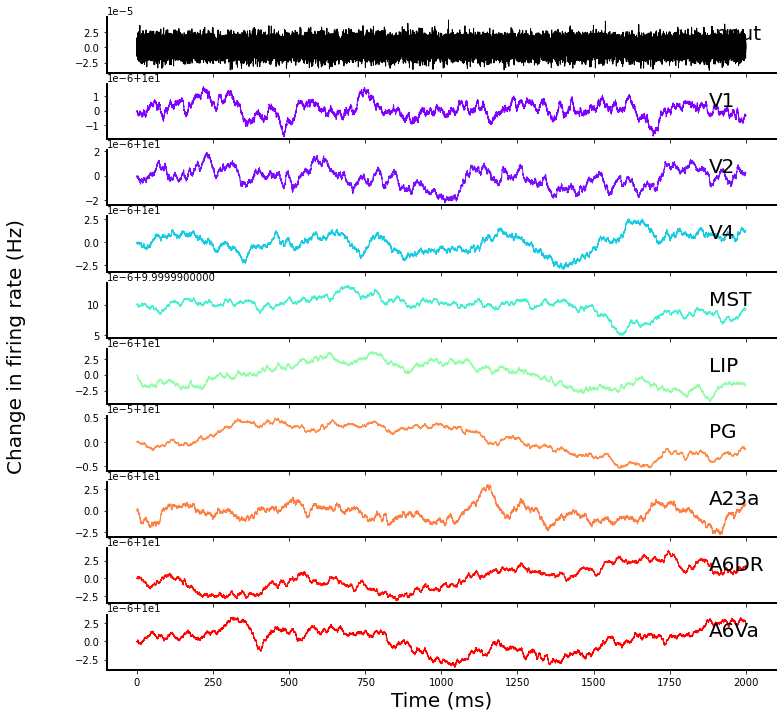

In [5]:
area_name_list = ['V1','V2','V4','MST','LIP','PG','A23a','A6DR','A6Va']
t_ind = t_plot < 2000
fig = TCP.plot_dynamics(p, r_exc[t_ind,:], r_inh[t_ind,:], I_stim_exc[t_ind], area_stim_idx, area_name_list, t_plot[t_ind], PULSE_INPUT=0)
# TCP.save_fig('Figures/3A')

# Fig.3B-3D -- see another notebook

# Fig.3E Timescale localization for each region depicted through plots of eigenvectors.

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


Text(0.5, 1.0, 'Original eigenvectors')

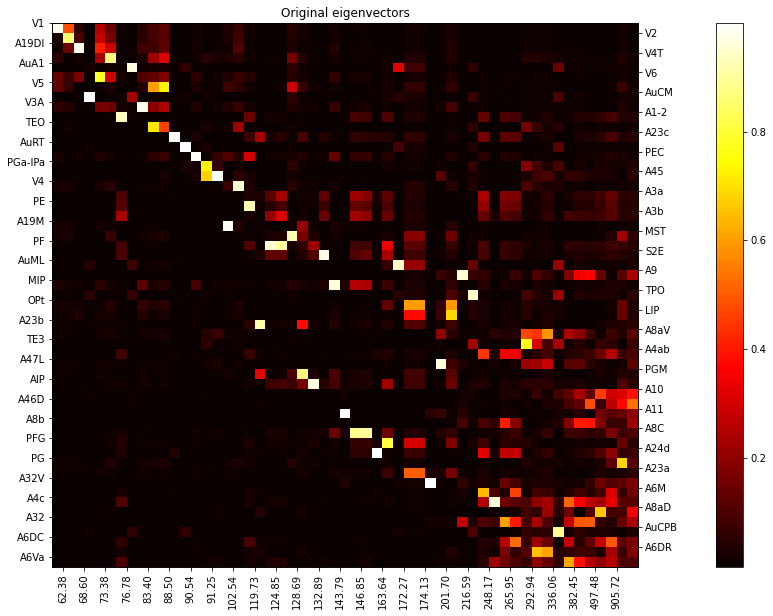

In [57]:
p_ori = pf.load_data(datafile)
p_ori,W_ori = pf.genetate_net_connectivity(p_ori.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)

p_ori['dist_mat'] = dist_mat
p_ori['full_dist_mat'] = full_dist_mat

ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow, eigVecs_slow_normed, theta_eigenvecs \
= tc.time_constant_module_shuffle_fln(p_ori.copy(),p_ori['fln_mat'].copy(),theta_flag=True)

## Figure 7 (Eigenvector Localization)
fig, ax = plt.subplots(1, 1,figsize=(14, 10), facecolor=(1, 1, 1))
# f1=ax[0].imshow(np.abs(eigVecs_reorder),cmap='hot')
# fig.colorbar(f1,ax=ax[0],pad=0.1)
# ax[0].set_title('eigenvector visualization')

tc.plot_eigenvalues(p_ori, eigVals_slow, eigVecs_slow_normed, fig, ax)
ax.set_title('Original eigenvectors')
# TCP.save_fig('Figures/3E')

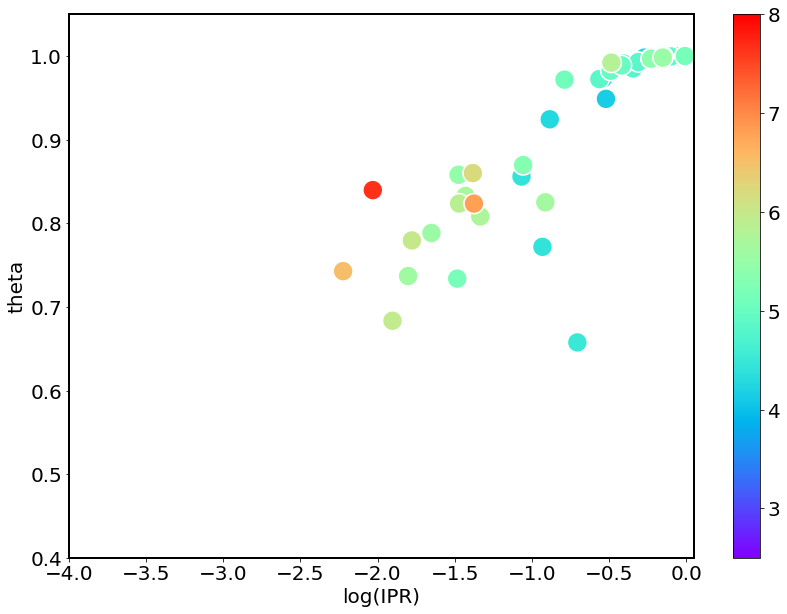

In [58]:
TCP.plot_IPR_theta(ipr_eigenvecs, theta_eigenvecs, eigVals_slow,flag_norm=1,norm_lim=[2.5,8])
TCP.save_fig('Figures/4_Supp_IPR_Theta_ori')

(-4.0, 0.0)

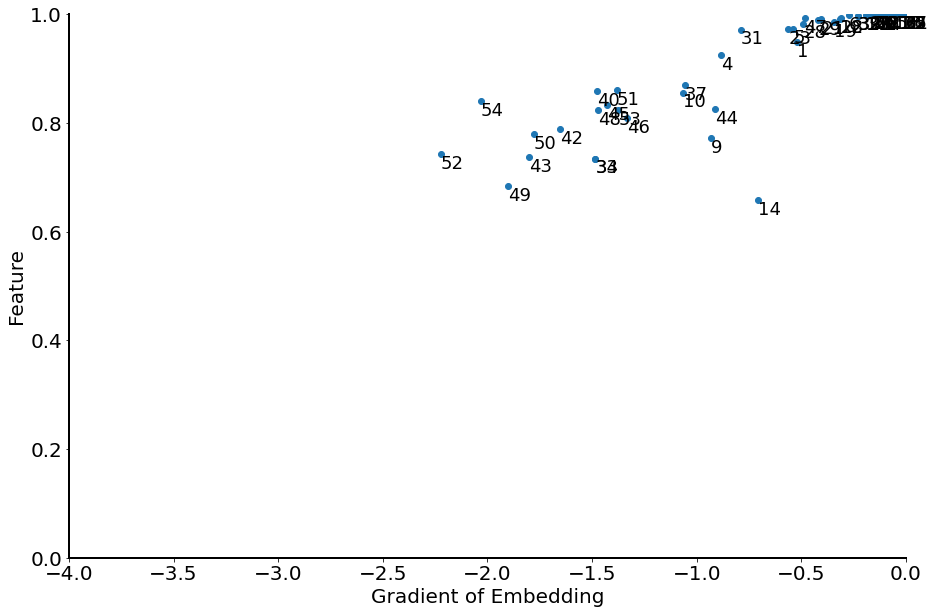

In [59]:
fig = TCP.plot_tau_feature(theta_eigenvecs, np.log(ipr_eigenvecs), np.arange(p_ori['n_area']),annotate_flag=True, p_fit=False)
plt.ylim([0, 1])
plt.xlim([-4, 0])

In [60]:
eigVecs_cut = np.abs(eigVecs_slow_normed)
max_ele = np.argmax(eigVecs_cut, axis=0)
sort_ind = np.argsort(max_ele)

Text(0.5, 1.0, 'Original eigenvectors (sorted)')

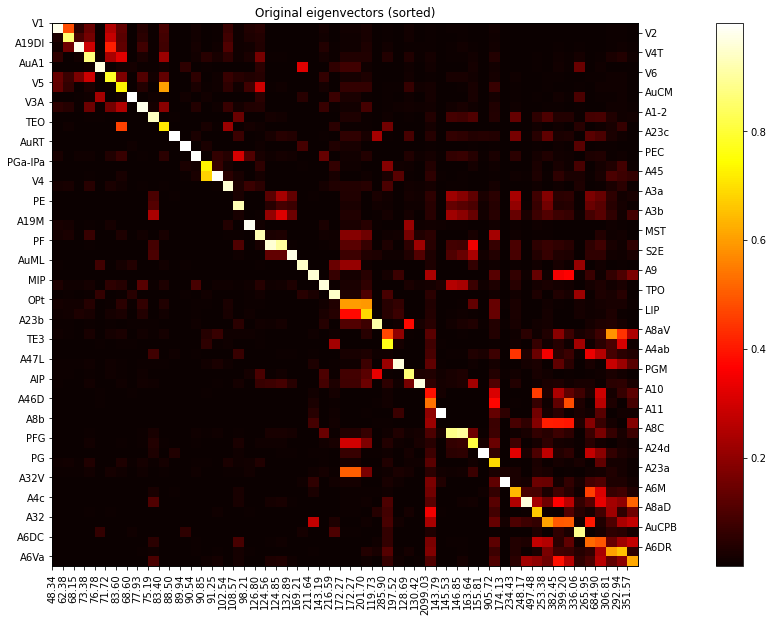

In [61]:
## Figure 7 (Eigenvector Localization)
fig, ax = plt.subplots(1, 1,figsize=(14, 10), facecolor=(1, 1, 1))
tc.plot_eigenvalues(p_ori, eigVals_slow[sort_ind], eigVecs_cut[:, sort_ind], fig, ax, flag_sort=1)
ax.set_title('Original eigenvectors (sorted)')
# TCP.save_fig('Figures/3E_new')

In [62]:
import pickle

def load_data(datafile):
    try:
        with open(datafile,'rb') as f:
            p = pickle.load(f)
    except UnicodeDecodeError:  # Python 3 compatibility
        with open(datafile,'rb') as f:
            p = pickle.load(f, encoding='latin1')
    
    print('dictionary keys=',p.keys())
    return p    
    
datafile='subgraph_data_marmoset.pkl'
data_mrm=load_data(datafile)

#==============================================================================
data_coordinate = pd.read_excel (r'mrm_coordinate.xlsx')
df_name = pd.DataFrame(data_coordinate, columns= ['area_name']).to_numpy()
name_list=list()

for i in np.arange(df_name.size):
    name_list.append(df_name[i][0])

area_order=np.zeros(df_name.size,dtype=np.int16)
for i in np.arange(df_name.size):
    area_order[i]=name_list.index(data_mrm['areas'][i])
print('area_order=',area_order)

df_x=pd.DataFrame(data_coordinate, columns= ['x']).to_numpy()
df_y=pd.DataFrame(data_coordinate, columns= ['y']).to_numpy()
df_z=pd.DataFrame(data_coordinate, columns= ['z']).to_numpy()

df_name=df_name[area_order]
df_x=df_x[area_order]
df_y=df_y[area_order]
df_z=df_z[area_order]

name_list=list()
for i in np.arange(df_name.size):
    name_list.append(df_name[i][0])

x_list=list()
y_list=list()
z_list=list()

for i in np.arange(df_name.size):
    x_list.append(df_x[i][0])
    y_list.append(df_y[i][0])
    z_list.append(df_z[i][0])
    

data_mrm['n_area']=df_name.size
data_mrm['eta']=0.618

fln_flat=data_mrm['fln_mat'].flatten()
fln_flat=fln_flat[fln_flat>0]
idx_fln=np.argsort(fln_flat)
fln_sort=np.sort(fln_flat)
# Control the density of connections
thr_fln=fln_sort[int(len(idx_fln)*0.75)]
print('thr_fln=',thr_fln)
print('num_strong_link=',len(fln_flat[fln_flat>thr_fln]))


w = np.empty([data_mrm['n_area'],data_mrm['n_area']])
paramuEEsp = 0.09
for i in range(data_mrm['n_area']):
    for j in range(i+1,data_mrm['n_area']):
        w[j,i] = (1 + data_mrm['eta'] * data_mrm['hier_vals'][j]) * paramuEEsp * data_mrm['fln_mat'][j,i]
        w[i,j] = (1 + data_mrm['eta'] * data_mrm['hier_vals'][i]) * paramuEEsp * data_mrm['fln_mat'][i,j]

dictionary keys= dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
area_order= [ 1  0 38 25 43 13 15 26 22 49 52 48 29 40 53 54 14 28 50 19 45 39 44 32
 16 42 41 30 24 23 10  6 34  7  5 21 33  2 35 51  3 31 27 20  9 18 36 12
 46 17 37 47 11  4  8]
thr_fln= 0.015209592068930907
num_strong_link= 463


In [63]:
np.shape(full_dist_mat)

(110, 110)

In [64]:
area_sort_id = np.argsort(full_dist_mat[0,:p['n_area']])

In [67]:
def plot_eigenmode_with_brain(eigVecs_cut, ipr_eigenvecs, theta_eigenvecs, eig_id, name='Figures/4_Supp_IPR_Theta_illu',k=0):
    size_eigval = eigVecs_cut[:,eig_id]  #0, 31, 44, 52

    par = np.ones(df_name.size,dtype=int)
    colormode=0
    alpha_level=0.4


    fig,ax=plt.subplots(figsize=(15,10))
    # ax.scatter(y_list,z_list,s=abs(par)*200,color='k')
    ax.set_title('IPR: {:.2f}, theta: {:.2f}'.format(ipr_eigenvecs[eig_id], theta_eigenvecs[eig_id]))
    
    for i in range(data_mrm['n_area']):
        for j in range(i+1,data_mrm['n_area']):
            x = [x_list[i],x_list[j]]
            y = [y_list[i],y_list[j]]
            z = [z_list[i],z_list[j]]
            if data_mrm['fln_mat'][j,i] > thr_fln or data_mrm['fln_mat'][i,j] > thr_fln:
                    if colormode==0:
                        plt.plot(y,z,color='red',linewidth = 25*(np.max(w[j,i]+w[i,j])+0.005),alpha=alpha_level)
                    else:
                        if data_mrm['fln_mat'][j,i] > thr_fln and data_mrm['fln_mat'][i,j] > thr_fln:
                            plt.plot(y,z,color='k',linewidth = 50*(np.max(w[j,i]+w[i,j])+0.015),alpha=alpha_level)
                        if data_mrm['fln_mat'][j,i] > thr_fln and data_mrm['fln_mat'][i,j] < thr_fln:
                            if data_mrm['hier_vals'][i]<data_mrm['hier_vals'][j]:
                                plt.plot(y,z,color='r',linewidth = 50*(np.max(w[j,i]+w[i,j])+0.015),alpha=alpha_level)
                            else:
                                plt.plot(y,z,color='b',linewidth = 50*(np.max(w[j,i]+w[i,j])+0.015),alpha=alpha_level)
                        if data_mrm['fln_mat'][j,i] < thr_fln and data_mrm['fln_mat'][i,j] > thr_fln:
                            if data_mrm['hier_vals'][i]<data_mrm['hier_vals'][j]:
                                plt.plot(y,z,color='b',linewidth = 50*(np.max(w[j,i]+w[i,j])+0.015),alpha=alpha_level)
                            else:
                                plt.plot(y,z,color='r',linewidth = 50*(np.max(w[j,i]+w[i,j])+0.015),alpha=alpha_level)

    plt.scatter(y_list,z_list,s=size_eigval*500,color='k', zorder=3)    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    TCP.save_fig(name+'_{}'.format(k))
    
    fig,ax=plt.subplots(figsize=(1,10))
    f=ax.pcolormesh(np.expand_dims(size_eigval[area_sort_id],1),cmap='hot', vmin=0, vmax=1)
    fig.colorbar(f,ax=ax,pad=0.1)
    
    TCP.save_fig(name+'_{}_eigvec'.format(k))

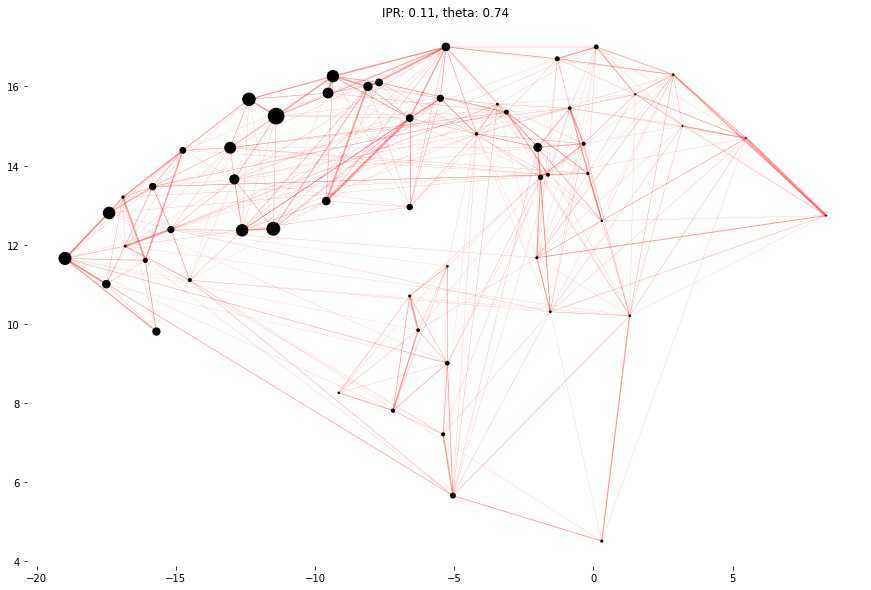

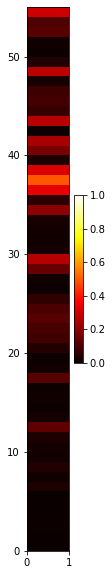

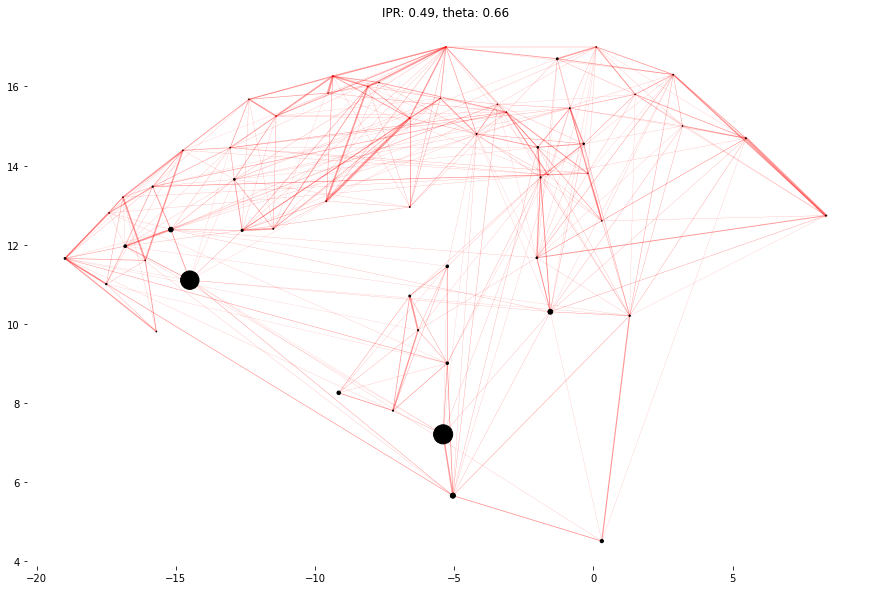

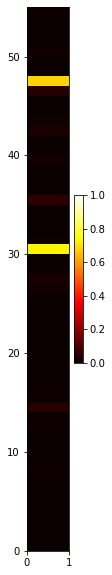

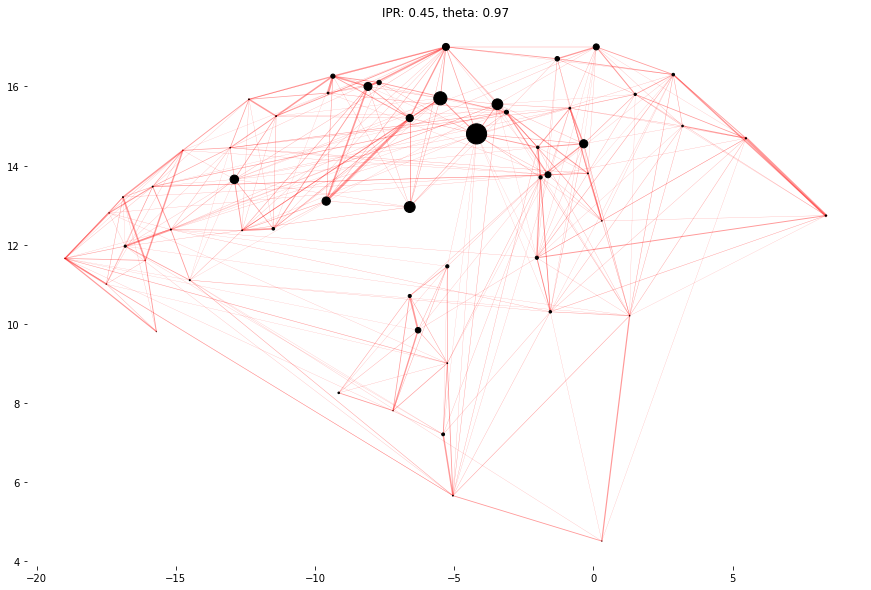

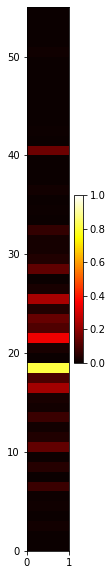

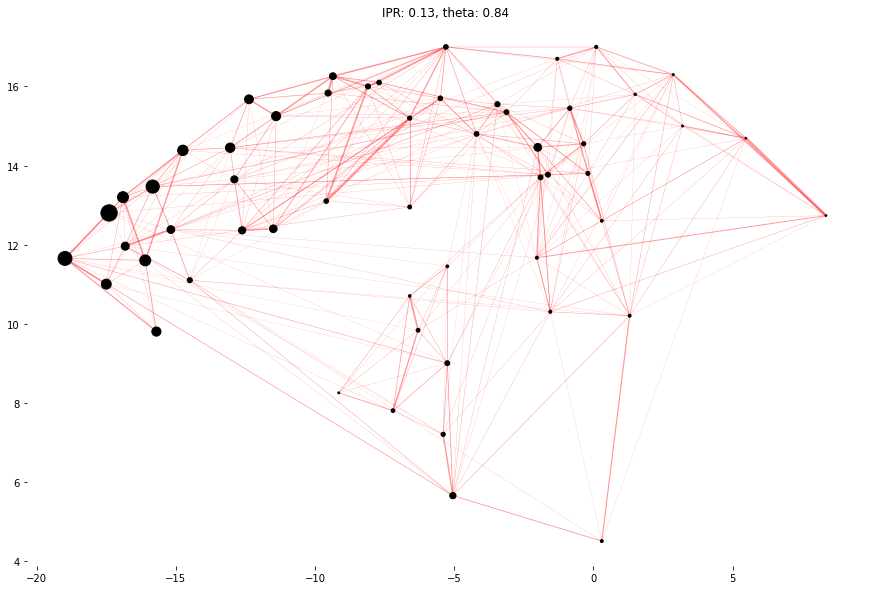

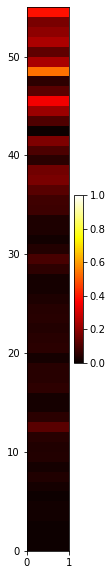

In [68]:
eig_id_lst = [52, 14, 31, 54] # [0, 31, 44, 52, 54]
for k in range(len(eig_id_lst)):
    eig_id = eig_id_lst[k]
    plot_eigenmode_with_brain(eigVecs_cut, ipr_eigenvecs, theta_eigenvecs, eig_id, name='Figures/4_Supp_IPR_Theta_illu',k=k)

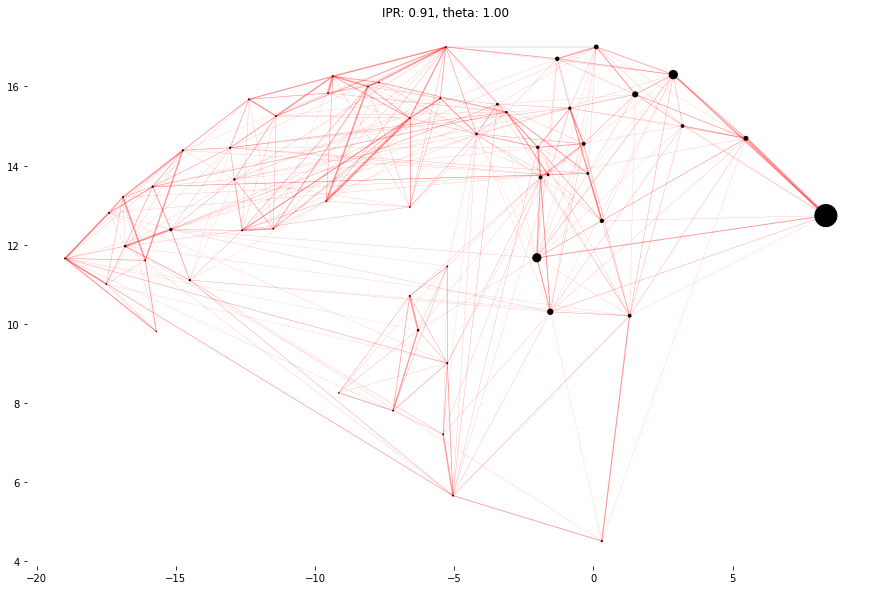

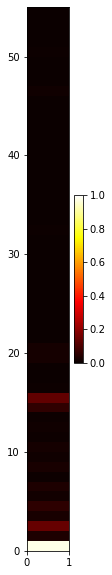

In [69]:
plot_eigenmode_with_brain(eigVecs_cut, ipr_eigenvecs, theta_eigenvecs, 0, name='Figures/4_Supp_IPR_Theta_illu',k=5)

# Fig. 3F & G Post-stimulus timescale localization

## Representation of activity after stimulus to a lower area. + Observation of timescale gradient in post-stimulus activity.

In [12]:
W_EI_ori = tc.generate_W_EI_shuffle_fln(p_ori.copy(), p_ori['fln_mat'].copy())
eigVals, eigVecs = np.linalg.eig(W_EI_ori)
id_sort = np.argsort(-1./np.real(eigVals))
eigVals = eigVals[id_sort]
eigVecs = eigVecs[:,id_sort]
eigVecs_inv = np.linalg.inv(eigVecs)

Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


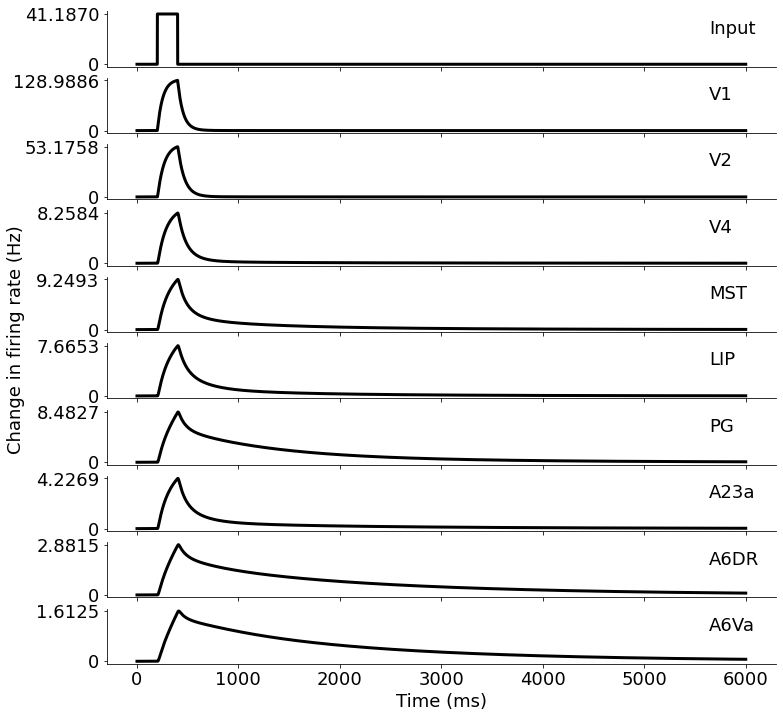

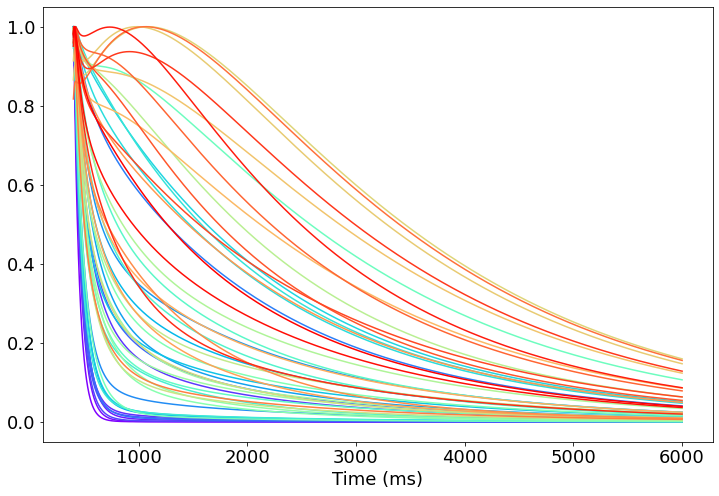

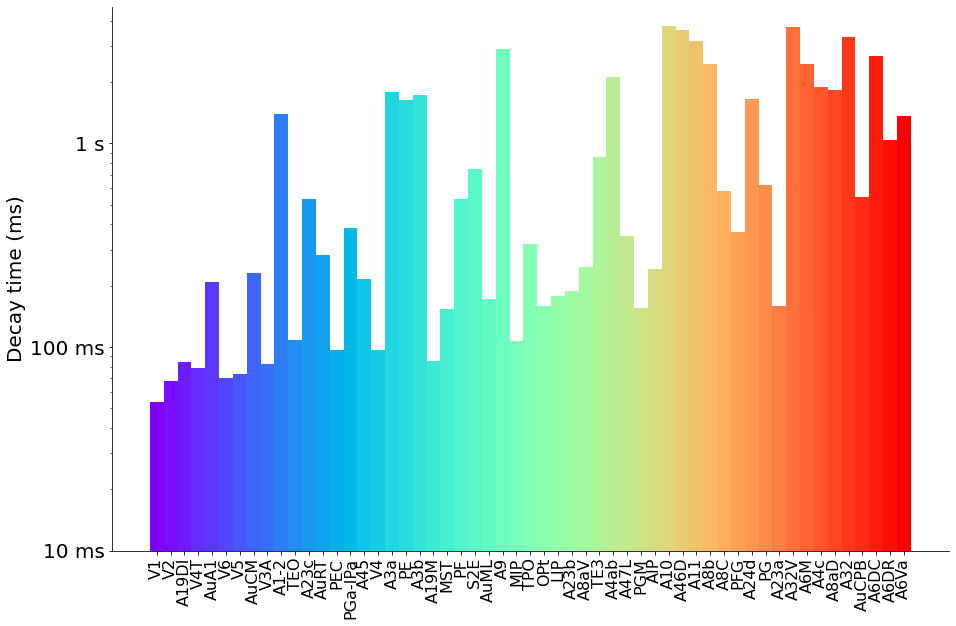

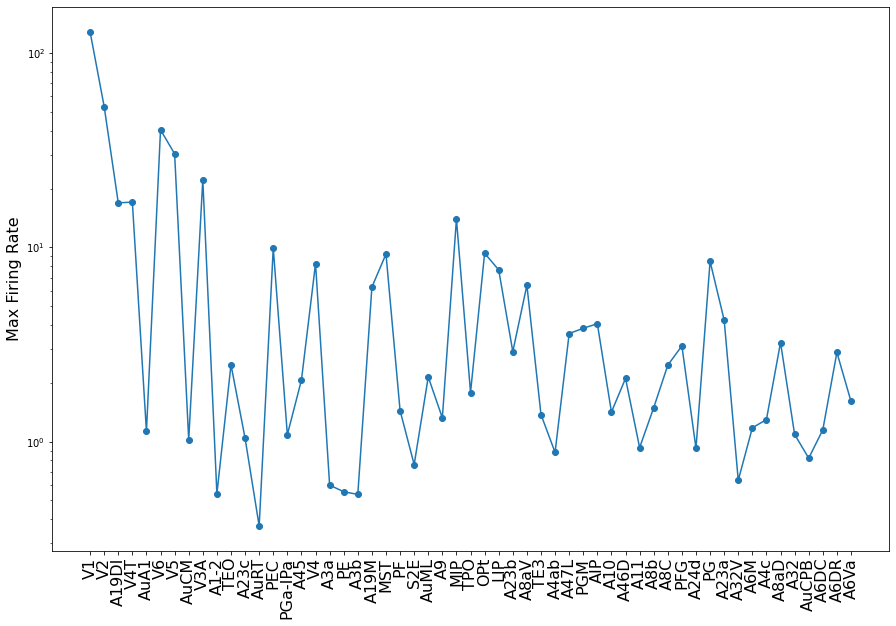

In [3]:
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate, f \
 = pf.run_stimulus(p, VISUAL_INPUT=1, TOTAL_INPUT=0, T=6000, PULSE_INPUT=1,
                    MACAQUE_CASE=MACAQUE_CASE ,GATING_PATHWAY=0, CONSENSUS_CASE=0)
# TCP.save_fig('Figures/3F')

In [4]:
t_index_post_stim = 12001

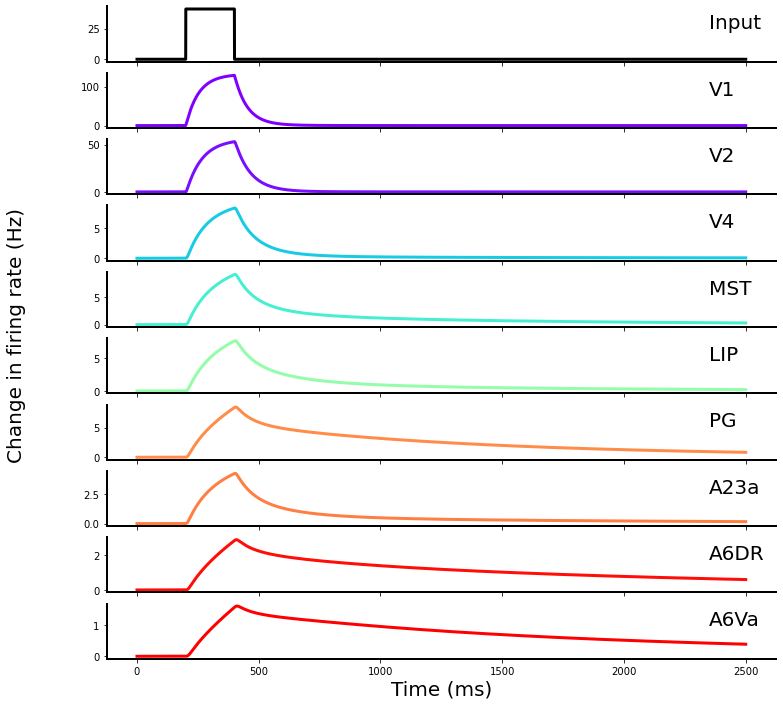

In [5]:
area_name_list = ['V1','V2','V4','MST','LIP','PG','A23a','A6DR','A6Va']
t_ind = t_plot < 2500
fig = TCP.plot_dynamics(p, r_exc[t_ind,:], r_inh[t_ind,:], I_stim_exc[t_ind,:], area_stim_idx, area_name_list, t_plot[t_ind], PULSE_INPUT=1)
TCP.save_fig('Figures/3F_a')

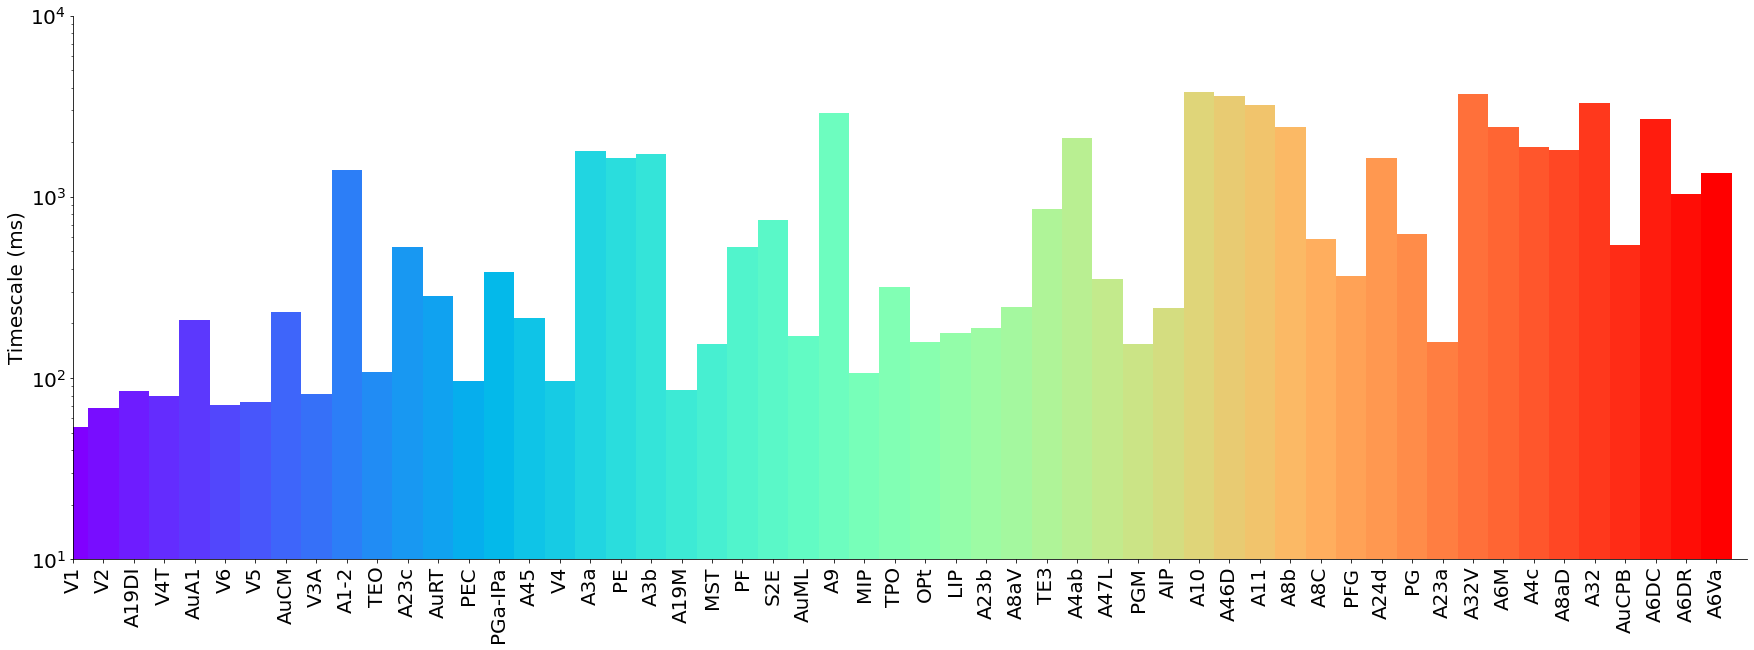

In [6]:
fig, ax=plt.subplots(figsize=(30,10), facecolor=(1, 1, 1))
clist = cm.get_cmap(plt.get_cmap('rainbow'))(np.linspace(0.0, 1.0, p['n_area']))[np.newaxis, :, :3]
ax.bar(np.arange(len(p['areas'])),decay_time,width = 1,color=clist[0])
ax.set_xticks(np.arange(len(p['areas'])))
# ax.set_yticks(np.linspace(0.0, 1000, 5))
# ax.set_yticklabels(np.linspace(0.0, 1000, 5),fontsize=16)
ax.set_xticklabels(p['areas'],rotation=90,fontsize=20)
ax.set_yticks([10, 100, 1000])
ax.set_yticklabels(['10 ms','100 ms','1 s'], fontsize=20)
ax.set_ylabel('Timescale (ms)',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim((0, p['n_area']))
ax.set_ylim(10, 10000)
ax.set_yscale('log')
TCP.save_fig('Figures/3F_b')

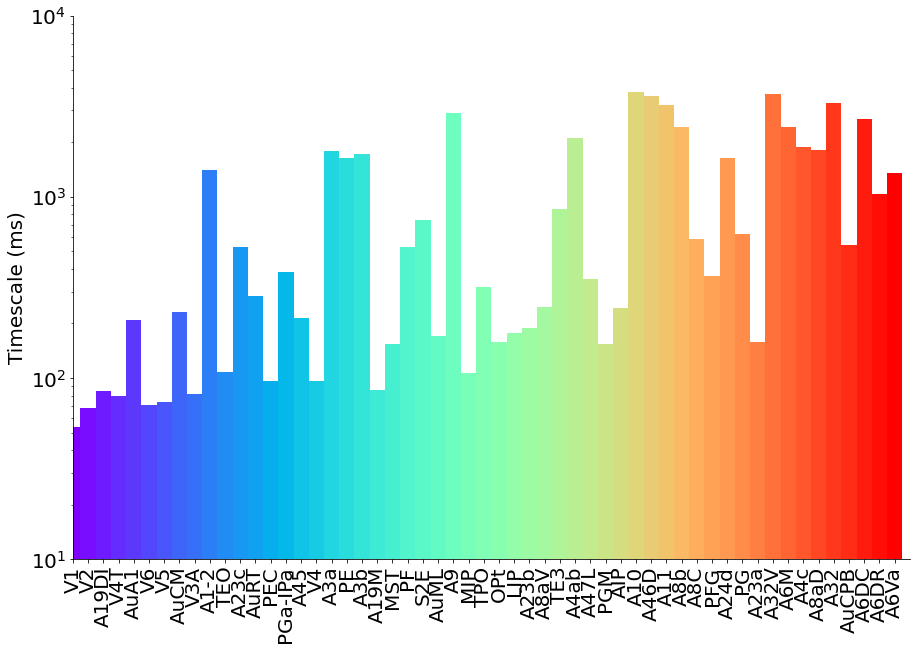

In [13]:
fig, ax=plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))
clist = cm.get_cmap(plt.get_cmap('rainbow'))(np.linspace(0.0, 1.0, p['n_area']))[np.newaxis, :, :3]
ax.bar(np.arange(len(p['areas'])),decay_time,width = 1,color=clist[0])
ax.set_xticks(np.arange(len(p['areas'])))
# ax.set_yticks(np.linspace(0.0, 1000, 5))
# ax.set_yticklabels(np.linspace(0.0, 1000, 5),fontsize=16)
ax.set_xticklabels(p['areas'],rotation=90,fontsize=20)
ax.set_yticks([10, 100, 1000])
ax.set_yticklabels(['10 ms','100 ms','1 s'], fontsize=20)
ax.set_ylabel('Timescale (ms)',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim((0, p['n_area']))
ax.set_ylim(10, 10000)
ax.set_yscale('log')
TCP.save_fig('Figures/3F_Supp_a')

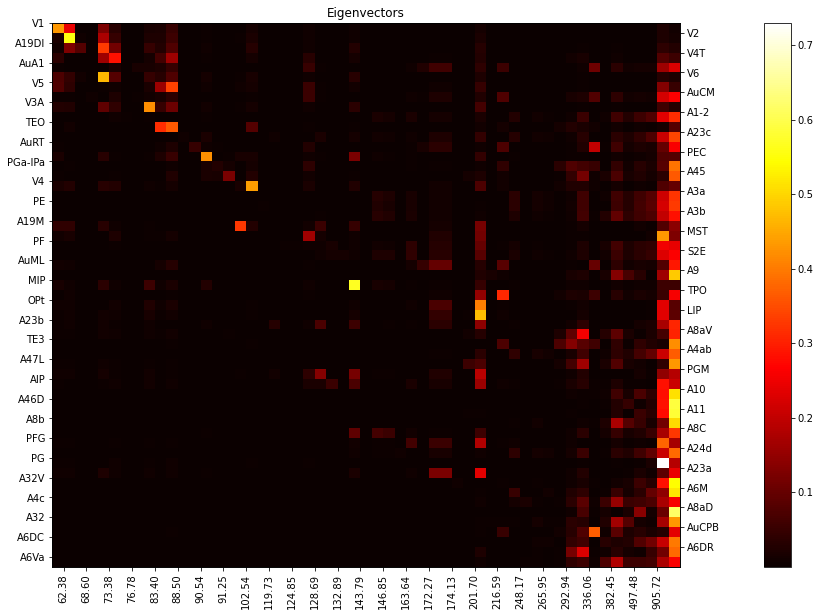

In [14]:
r = np.concatenate([r_exc[t_index_post_stim,:]-10, r_inh[t_index_post_stim,:]-35])

y = np.matmul(eigVecs_inv, r)

y_rep = np.tile(y, [2*p_ori['n_area'],1])

a = np.multiply(eigVecs, y_rep)
contru_plot = np.abs(a[:p_ori['n_area'], p_ori['n_area']:])

contru_sum = np.sum(contru_plot,axis=1)
contru_sum_rep = np.tile(contru_sum, [p_ori['n_area'],1]).T
contru_norm = contru_plot / contru_sum_rep

fig, ax = plt.subplots(1, 1,figsize=(15, 10), facecolor=(1, 1, 1))
tc.plot_eigenvalues(p_ori, eigVals[p['n_area']:], contru_norm, fig, ax)

TCP.save_fig('Figures/3F_Supp_b')

## Illustrating the different timescales after stimulus to different brain areas

Running network with stimulation to A4ab   PULSE_INPUT=1   MACAQUE_CASE=0


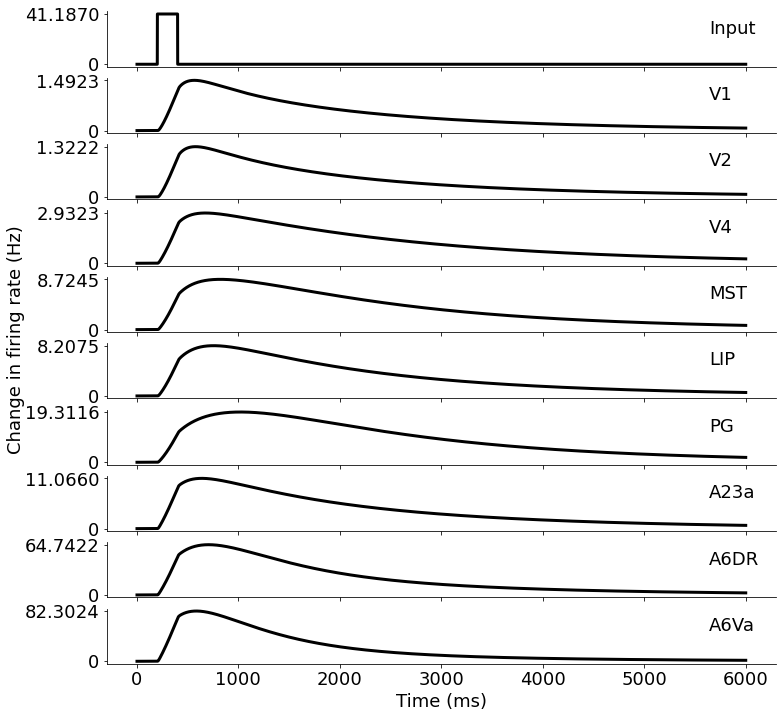

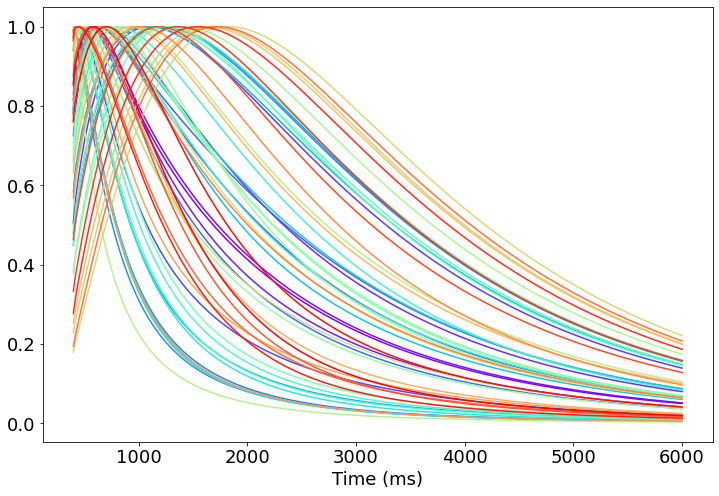

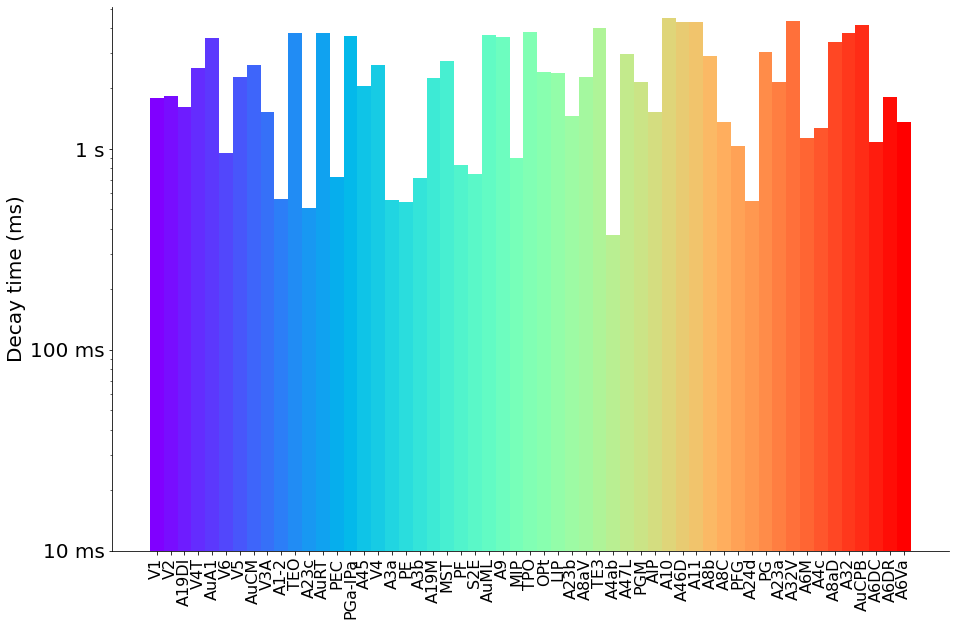

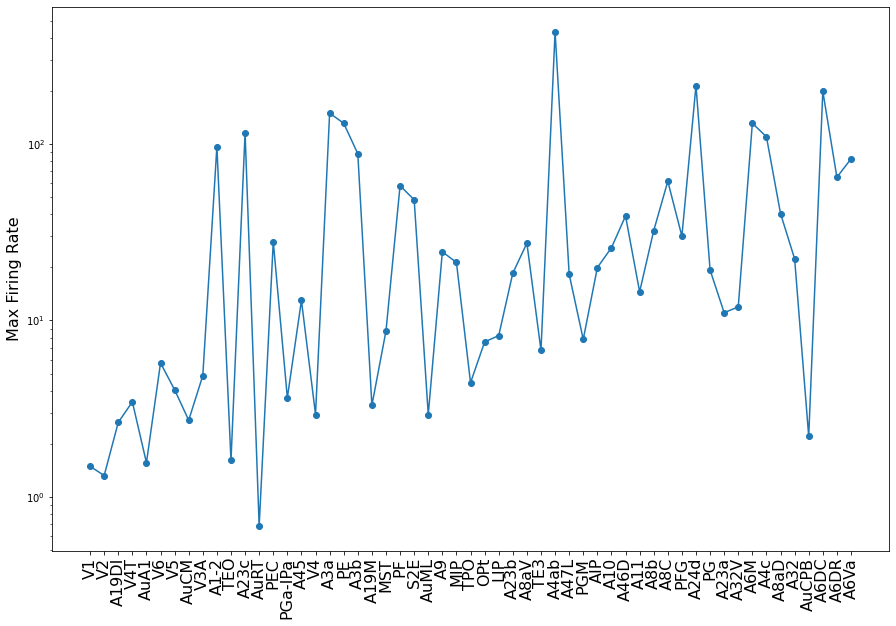

In [15]:
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate, f \
 = pf.run_stimulus(p, VISUAL_INPUT=1, TOTAL_INPUT=0, T=6000, PULSE_INPUT=1,stim_area='A4ab',
                    MACAQUE_CASE=MACAQUE_CASE ,GATING_PATHWAY=0, CONSENSUS_CASE=0)

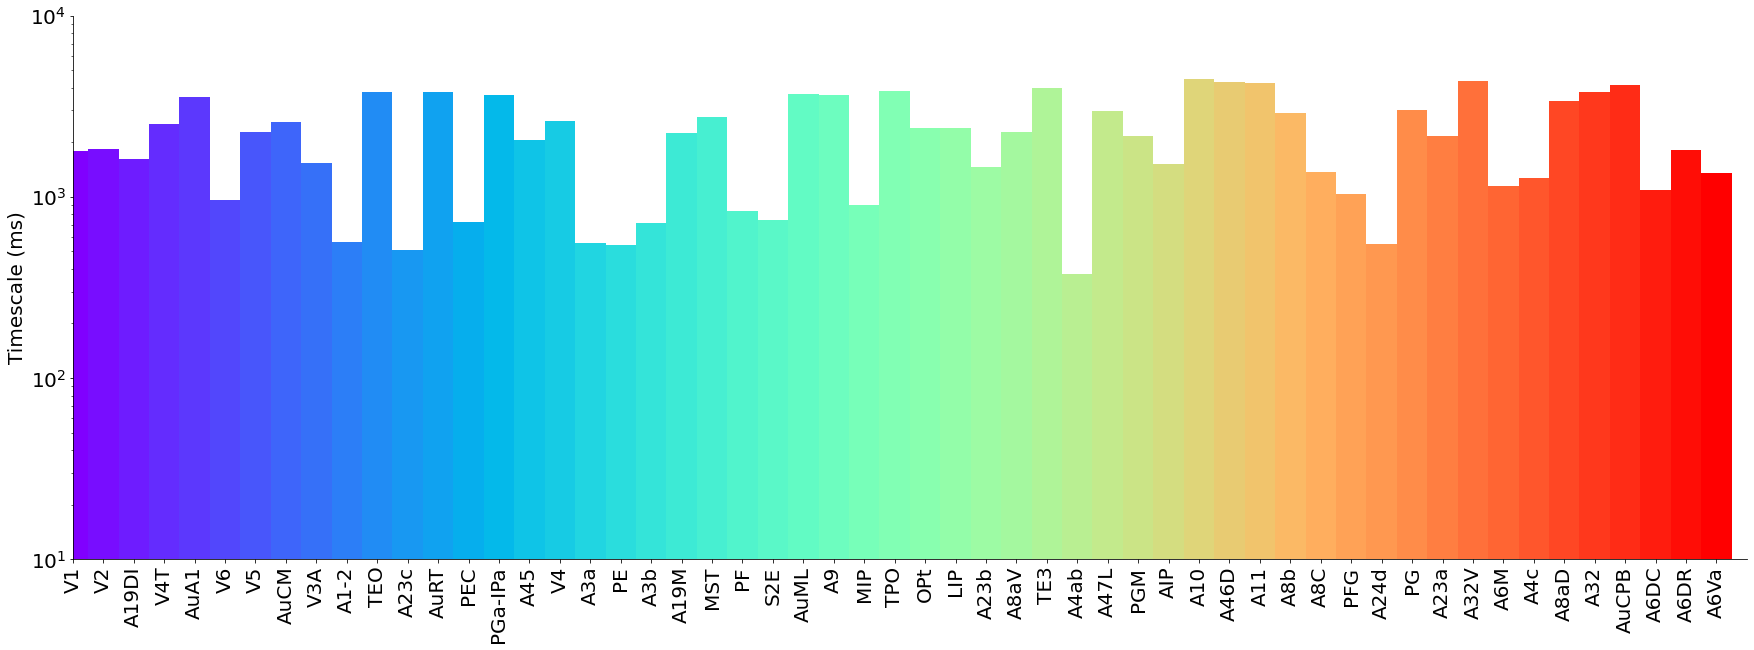

In [16]:
fig, ax=plt.subplots(figsize=(30,10), facecolor=(1, 1, 1))
clist = cm.get_cmap(plt.get_cmap('rainbow'))(np.linspace(0.0, 1.0, p['n_area']))[np.newaxis, :, :3]
ax.bar(np.arange(len(p['areas'])),decay_time,width = 1,color=clist[0])
ax.set_xticks(np.arange(len(p['areas'])))
# ax.set_yticks(np.linspace(0.0, 1000, 5))
# ax.set_yticklabels(np.linspace(0.0, 1000, 5),fontsize=16)
ax.set_xticklabels(p['areas'],rotation=90,fontsize=20)
ax.set_yticks([10, 100, 1000])
ax.set_yticklabels(['10 ms','100 ms','1 s'], fontsize=20)
ax.set_ylabel('Timescale (ms)',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim((0, p['n_area']))
ax.set_ylim(10, 10000)
ax.set_yscale('log')
TCP.save_fig('Figures/3F_A4ab_b')

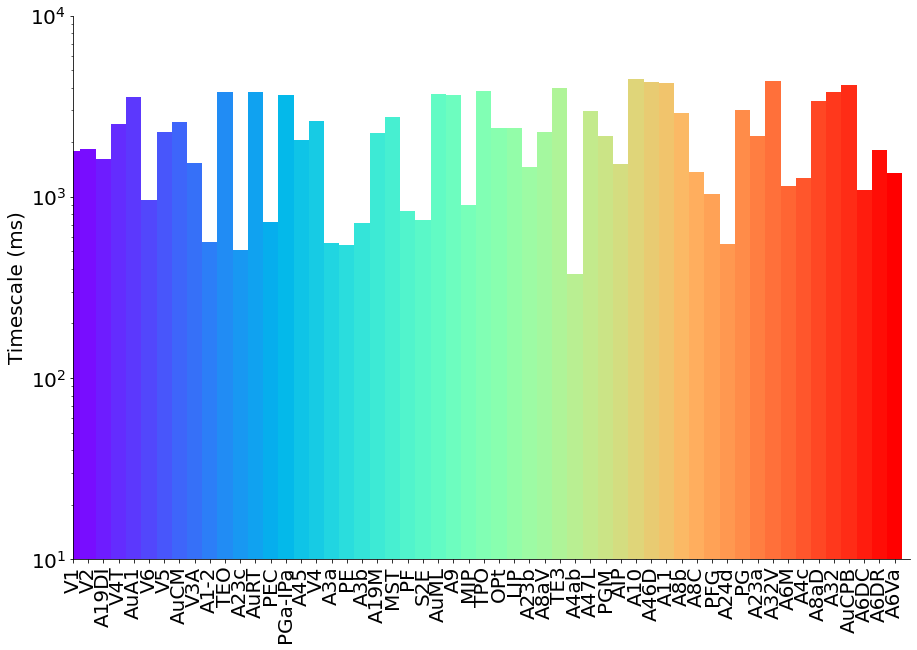

In [17]:
fig, ax=plt.subplots(figsize=(15,10), facecolor=(1, 1, 1))
clist = cm.get_cmap(plt.get_cmap('rainbow'))(np.linspace(0.0, 1.0, p['n_area']))[np.newaxis, :, :3]
ax.bar(np.arange(len(p['areas'])),decay_time,width = 1,color=clist[0])
ax.set_xticks(np.arange(len(p['areas'])))
# ax.set_yticks(np.linspace(0.0, 1000, 5))
# ax.set_yticklabels(np.linspace(0.0, 1000, 5),fontsize=16)
ax.set_xticklabels(p['areas'],rotation=90,fontsize=20)
ax.set_yticks([10, 100, 1000])
ax.set_yticklabels(['10 ms','100 ms','1 s'], fontsize=20)
ax.set_ylabel('Timescale (ms)',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim((0, p['n_area']))
ax.set_ylim(10, 10000)
ax.set_yscale('log')
TCP.save_fig('Figures/3F_Supp_A4ab_a')

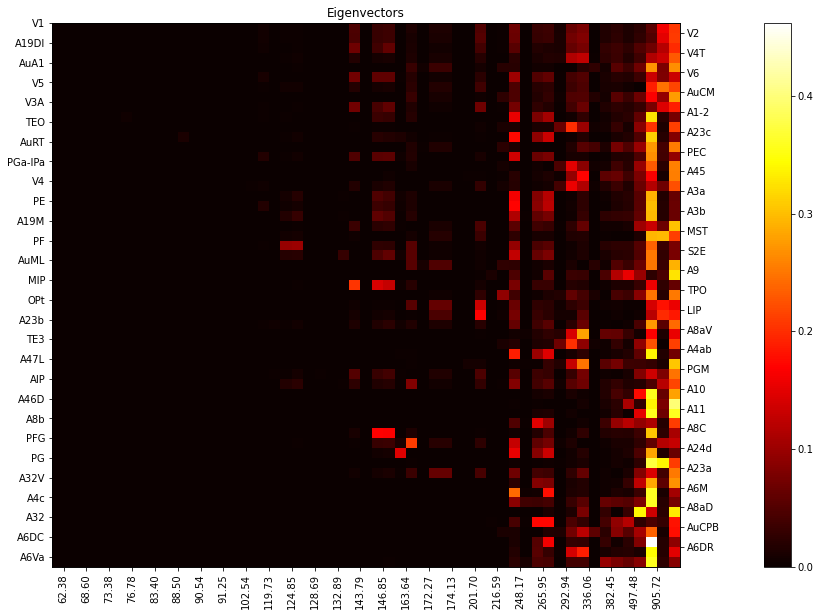

In [18]:
r = np.concatenate([r_exc[t_index_post_stim,:]-10, r_inh[t_index_post_stim,:]-35])

y = np.matmul(eigVecs_inv, r)

y_rep = np.tile(y, [2*p_ori['n_area'],1])

a = np.multiply(eigVecs, y_rep)
contru_plot = np.abs(a[:p_ori['n_area'], p_ori['n_area']:])

contru_sum = np.sum(contru_plot,axis=1)
contru_sum_rep = np.tile(contru_sum, [p_ori['n_area'],1]).T
contru_norm = contru_plot / contru_sum_rep

fig, ax = plt.subplots(1, 1,figsize=(15, 10), facecolor=(1, 1, 1))
tc.plot_eigenvalues(p_ori, eigVals_slow, contru_norm, fig, ax)

TCP.save_fig('Figures/3F_Supp_A4ab_b')

# Fig. 4A Eliminating gradient leads to absence of timescale localization.

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
ZERO_HIER 

CONSENSUS_CASE=0
No STRONG GBA


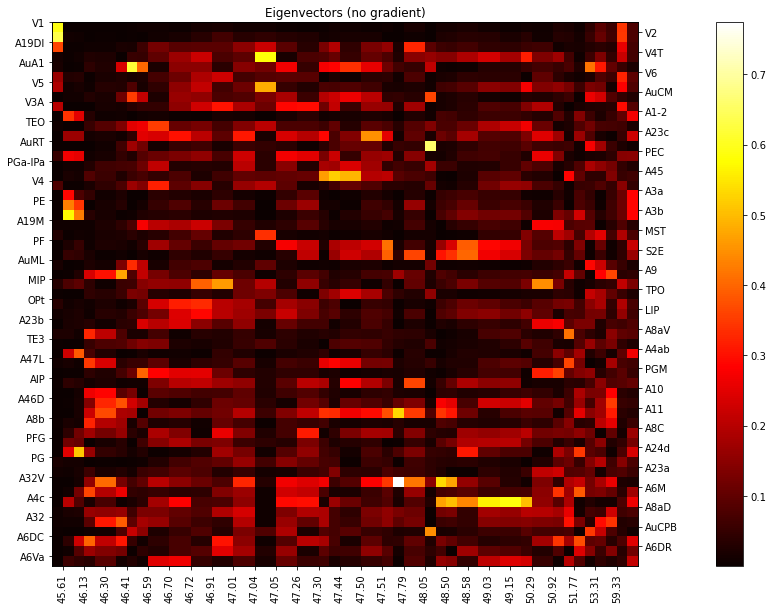

In [175]:
p_nog = pf.load_data(datafile)
p_nog,W_nog = pf.genetate_net_connectivity(p,ZERO_HIER = 1, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)

p_nog['dist_mat'] = dist_mat
p_nog['full_dist_mat'] = full_dist_mat

ipr_eigenvecs_nog, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_nog, eigVecs_slow_normed_nog, theta_eigenvecs_nog \
= tc.time_constant_module_shuffle_fln(p_nog.copy(),p_nog['fln_mat'].copy(),theta_flag=1)

## Figure 7 (Eigenvector Localization)
fig, ax = plt.subplots(1, 1,figsize=(14, 10), facecolor=(1, 1, 1))

tc.plot_eigenvalues(p_nog, eigVals_slow_nog, eigVecs_slow_normed_nog, fig, ax)
ax.set_title('Eigenvectors (no gradient)')
TCP.save_fig('Figures/4A')

# Fig. 4A Eliminating gradient leads to absence of timescale localization.

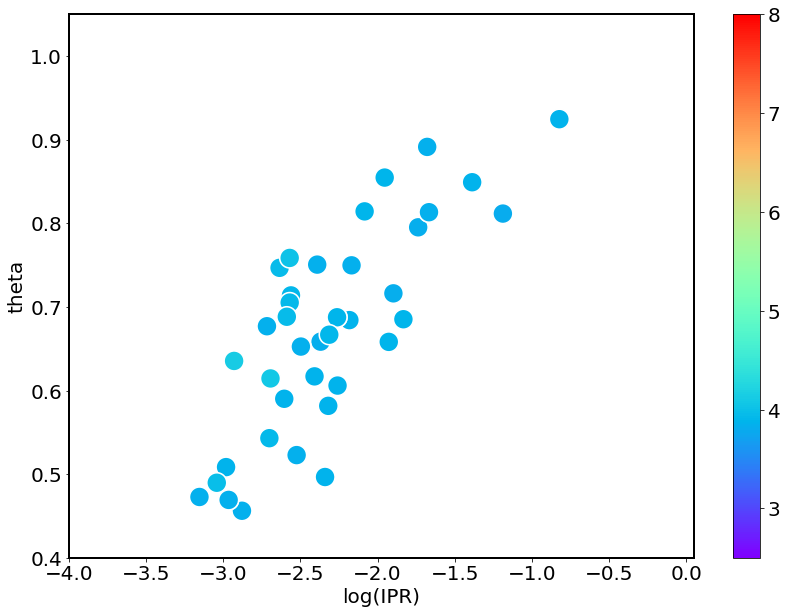

In [176]:
TCP.plot_IPR_theta(ipr_eigenvecs_nog, theta_eigenvecs_nog, eigVals_slow_nog,flag_norm=1,norm_lim=[2.5,8])
TCP.save_fig('Figures/4_Supp_IPR_Theta_nog')

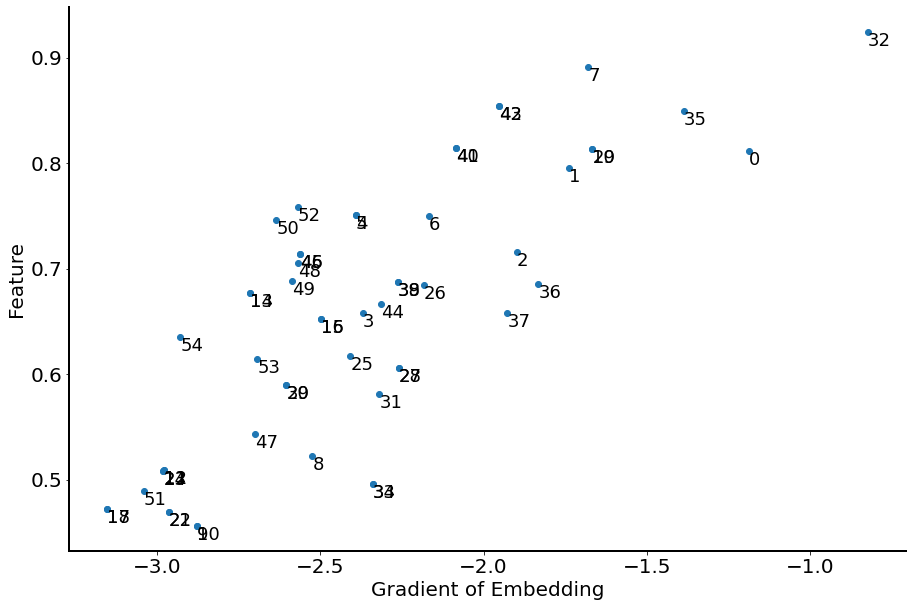

In [19]:
fig = TCP.plot_tau_feature(theta_eigenvecs_nog, np.log(ipr_eigenvecs_nog), np.arange(p_ori['n_area']),annotate_flag=True, p_fit=False)

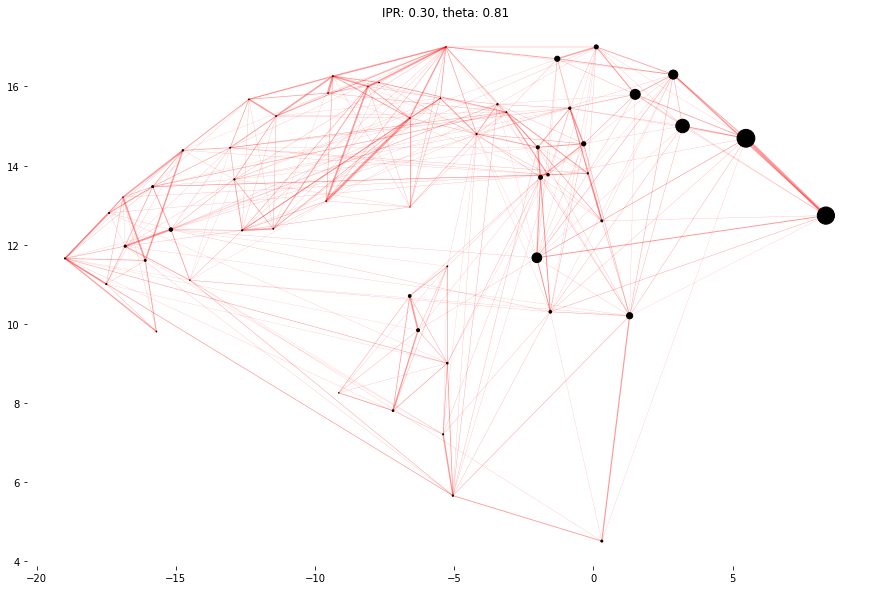

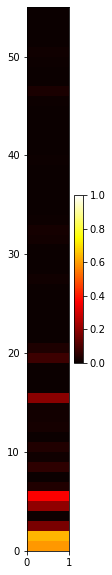

In [18]:
eigVecs_cut_nog = np.abs(eigVecs_slow_normed_nog)
plot_eigenmode_with_brain(eigVecs_cut_nog, ipr_eigenvecs_nog, theta_eigenvecs_nog, 0, name='Figures/4_Supp_IPR_Theta_illu_NoG',k=0)

# Fig. 4B Evaluation of how the magnitude of timescale localization depends on the magnitude of the gradient.

## Gradient starting from 0 to full 

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


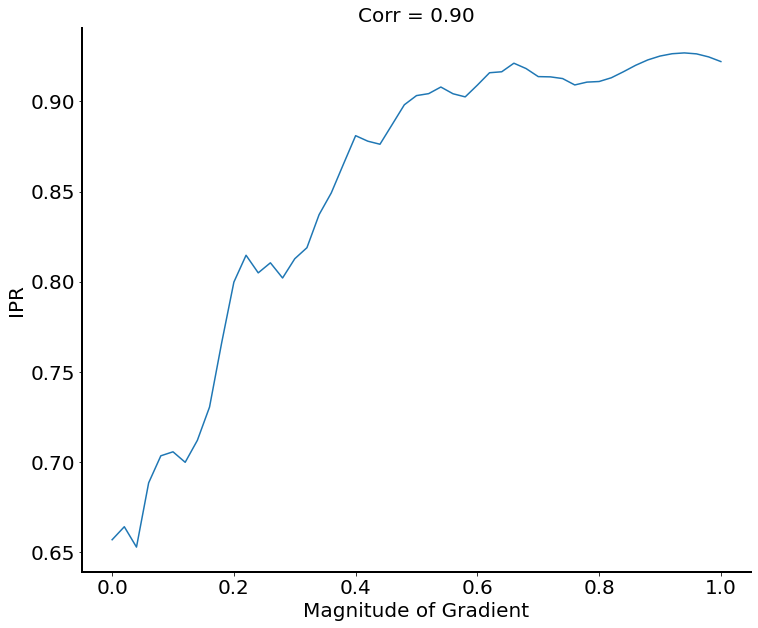

In [25]:
p_t = pf.load_data(datafile)
p_t,W_t = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)
hier_vals_ori = p_t['hier_vals'] + 0.0
lamb_lst = np.linspace(0, 1, 51)
# lamb_lst = np.array([0])
IPR_lst = 0 * lamb_lst
theta_lst = 0 * lamb_lst
for i in range(len(lamb_lst)):
    lamb = lamb_lst[i]
    hier_vals_t = lamb * hier_vals_ori
    p_tt = p_t.copy(); p_tt['hier_vals'] = hier_vals_t; p_tt['hier_vals_inh'] = hier_vals_t
    ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_break_EI, eigVecs_slow_normed_break_EI, theta_eigenvecs \
    = tc.time_constant_module_shuffle_fln(p_tt.copy(),p_tt['fln_mat'].copy(), theta_flag=1)
    IPR_lst[i] = np.mean(ipr_eigenvecs)
    theta_lst[i] = np.mean(theta_eigenvecs)
#     fig, ax = plt.subplots(1,1,figsize=(15, 10))
#     tc.plot_func_connectivity(p, np.abs(FC_model_t), fig, ax)
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(lamb_lst, IPR_lst, '*-')
# fig = TCP.plot_line_curve(theta_lst, lamb_lst, p_t['areas'],
#                           x_label='Magnitude of Gradient', y_label='IPR')
# fig.set_figwidth(12)
# TCP.save_fig('Figures/4B')

In [26]:
# fig = TCP.plot_line_curve(IPR_lst, lamb_lst, p_t['areas'],
#                           x_label='Magnitude of Gradient', y_label='IPR')
# fig.set_figwidth(12)
# TCP.save_fig('Figures/4B')

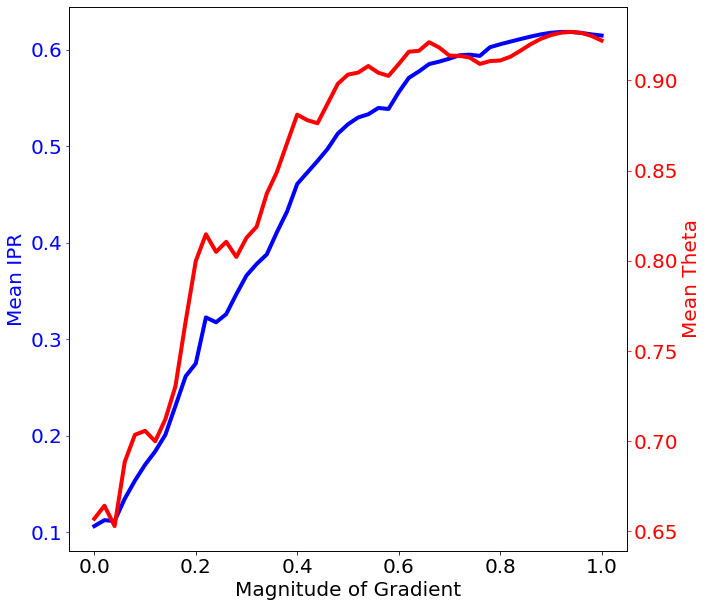

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 10), facecolor=(1, 1, 1))
ax2 = ax1.twinx()

ax1.plot(lamb_lst, IPR_lst, 'b-', label="Mean IPR", linewidth=4)
ax2.plot(lamb_lst, theta_lst, 'r-', label="Mean Theta", linewidth=4)

ax1.set_xlabel('Magnitude of Gradient', fontsize=20)
ax1.set_ylabel("Mean IPR", color='b', fontsize=20)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', colors='b', labelsize=20)
# ax1.legend(loc="upper left")

ax2.set_ylabel("Mean Theta", color='r', fontsize=20)
ax2.tick_params('y', colors='r', labelsize=20)
TCP.save_fig('Figures/4B')

## Interpolation between gradient and all 1 vector

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


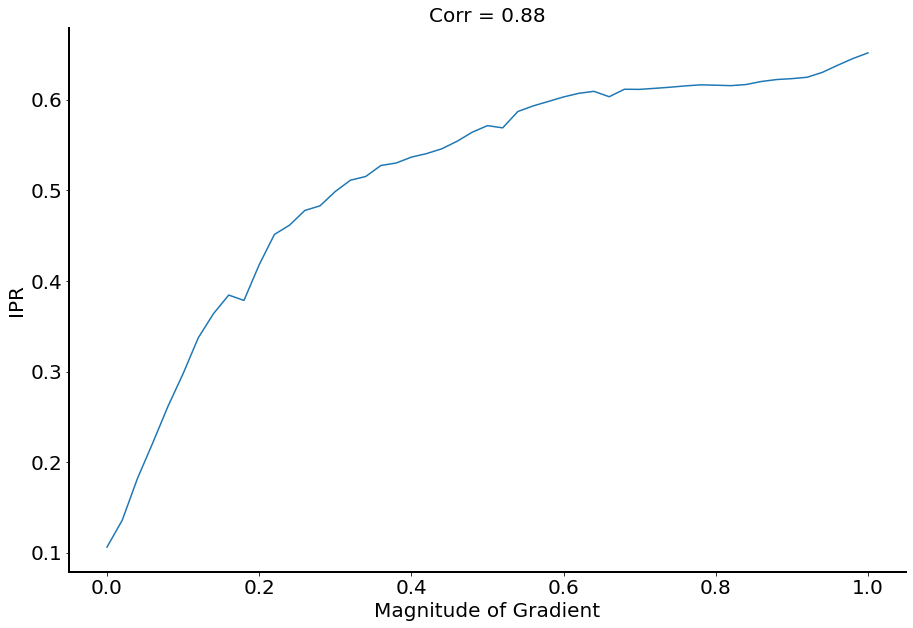

In [28]:
p_t = pf.load_data(datafile)
p_t,W_t = pf.genetate_net_connectivity(p,ZERO_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)
hier_vals_ori = p_t['hier_vals'] + 0.0
lamb_lst = np.linspace(0, 1, 51)
# lamb_lst = np.array([0])
IPR_lst = 0 * lamb_lst
for i in range(len(lamb_lst)):
    lamb = lamb_lst[i]
    hier_vals_t = (1-lamb) * np.ones(len(p['areas'])) * np.mean(hier_vals_ori) + lamb * hier_vals_ori
    p_tt = p_t.copy(); p_tt['hier_vals'] = hier_vals_t; p_tt['hier_vals_inh'] = hier_vals_t
    ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_break_EI, eigVecs_slow_normed_break_EI \
    = tc.time_constant_module_shuffle_fln(p_tt.copy(),p_tt['fln_mat'].copy())
    IPR_lst[i] = np.mean(ipr_eigenvecs)
#     fig, ax = plt.subplots(1,1,figsize=(15, 10))
#     tc.plot_func_connectivity(p, np.abs(FC_model_t), fig, ax)
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(lamb_lst, IPR_lst, '*-')
fig = TCP.plot_line_curve(IPR_lst, lamb_lst, p_t['areas'],
                          x_label='Magnitude of Gradient', y_label='IPR')
TCP.save_fig('Figures/4B_Supp')

# Fig. 4C Breaking E-I balance leads to absence of timescale localization.

CONSENSUS_CASE=0
No STRONG GBA


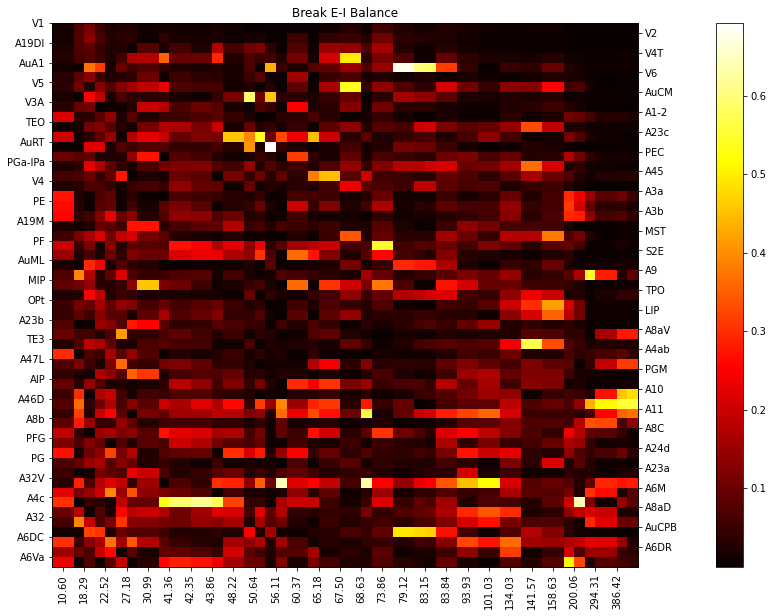

In [20]:
# p_break_EI,W_break_EI = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
#                                    SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=1,MACAQUE_CASE=MACAQUE_CASE,
#                                    GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
#                                    diverse_hi=4, BREAK_EI=1)

p_break_EI,W_break_EI = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)

p_break_EI['wEI'] = p_break_EI['wEI'] * 1.1

p_break_EI['dist_mat'] = dist_mat
p_break_EI['full_dist_mat'] = full_dist_mat

ipr_eigenvecs_break_EI, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_break_EI, eigVecs_slow_normed_break_EI, theta_eigenvecs_break_EI \
= tc.time_constant_module_shuffle_fln(p_break_EI.copy(),p_break_EI['fln_mat'].copy(), theta_flag=1)

# Break E-I balance
fig, ax = plt.subplots(1, 1,figsize=(14, 10), facecolor=(1, 1, 1))
tc.plot_eigenvalues(p_break_EI,eigVals_slow_break_EI, eigVecs_slow_normed_break_EI, fig, ax)
ax.set_title('Break E-I Balance')
TCP.save_fig('Figures/4C')

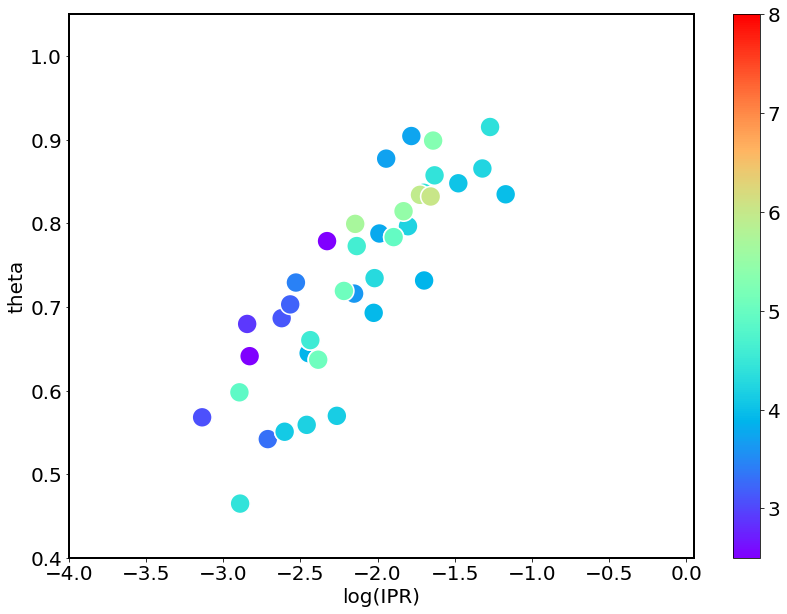

In [21]:
TCP.plot_IPR_theta(ipr_eigenvecs_break_EI, theta_eigenvecs_break_EI, eigVals_slow_break_EI,flag_norm=1,norm_lim=[2.5,8])
TCP.save_fig('Figures/4_Supp_IPR_Theta_break_EI')

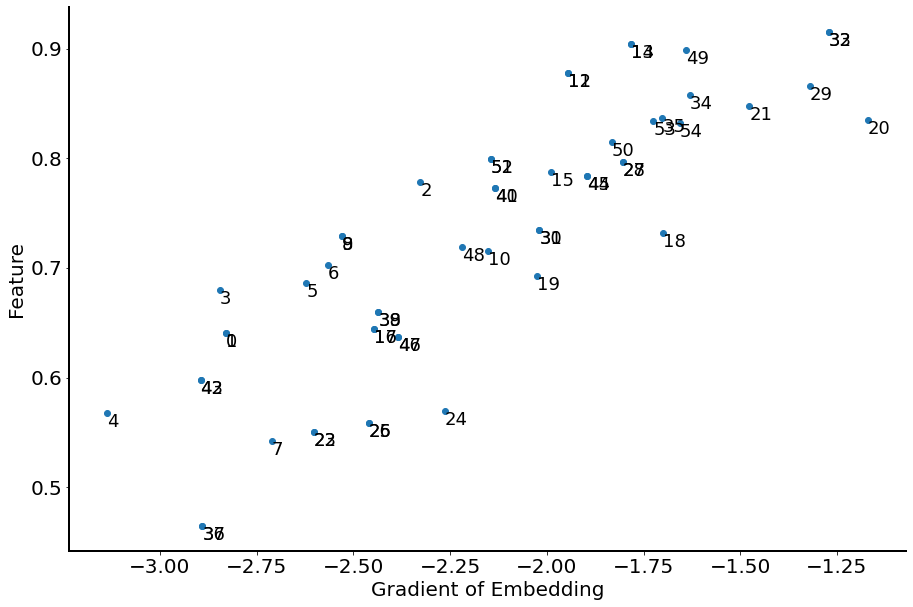

In [22]:
fig = TCP.plot_tau_feature(theta_eigenvecs_break_EI, np.log(ipr_eigenvecs_break_EI), np.arange(p_ori['n_area']),annotate_flag=True, p_fit=False)

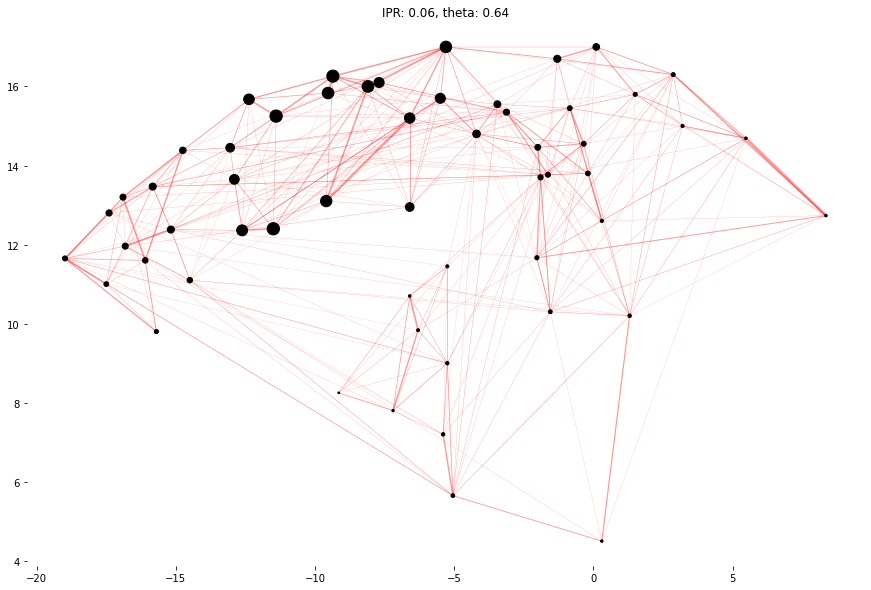

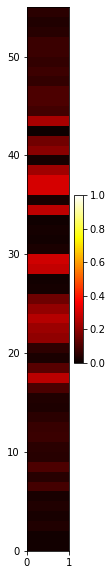

In [26]:
eigVecs_cut_break_EI = np.abs(eigVecs_slow_normed_break_EI)
plot_eigenmode_with_brain(eigVecs_cut_break_EI, ipr_eigenvecs_break_EI, theta_eigenvecs_break_EI, 0, name='Figures/4_Supp_IPR_Theta_illu_break_EI',k=0)

# Fig. 4D Examination of the effects of shuffled FLN on timescale range & spatial localization.

n_trial= 0
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 1
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 2
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 3
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 4
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 5
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 6
SHUFFLE_TYPE==0:  all elements are randomly permuted
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 7
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 8
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 9
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 10
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 11
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 12
SHUFFLE_TYPE==0:  all elements are randomly permuted
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 13
SHUFFLE_TYPE==0:  all elements are randomly per

n_trial= 124
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 125
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 126
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 127
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 128
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 129
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 130
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 131
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 132
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 133
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 134
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 135
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 136
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 137
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 138
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 1

n_trial= 249
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 250
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 251
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 252
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 253
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 254
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 255
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 256
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 257
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 258
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 259
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 260
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 261
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 262
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 263
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 2

n_trial= 374
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 375
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 376
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 377
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 378
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 379
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 380
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 381
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 382
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 383
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 384
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 385
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 386
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 387
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 388
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 3

n_trial= 499
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 500
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 501
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 502
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 503
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 504
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 505
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 506
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 507
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 508
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 509
SHUFFLE_TYPE==0:  all elements are randomly permuted
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 510
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 511
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 512
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 513
SHUFFLE_TY

n_trial= 623
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 624
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 625
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 626
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 627
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 628
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 629
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 630
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 631
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 632
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 633
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 634
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 635
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 636
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 637
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 6

n_trial= 746
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 747
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 748
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 749
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 750
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 751
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 752
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 753
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 754
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 755
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 756
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 757
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 758
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 759
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 760
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 7

n_trial= 869
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 870
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 871
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 872
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 873
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 874
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 875
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 876
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 877
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 878
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 879
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 880
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 881
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 882
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 883
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 8

n_trial= 993
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 994
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 995
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 996
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 997
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 998
SHUFFLE_TYPE==0:  all elements are randomly permuted
n_trial= 999
SHUFFLE_TYPE==0:  all elements are randomly permuted


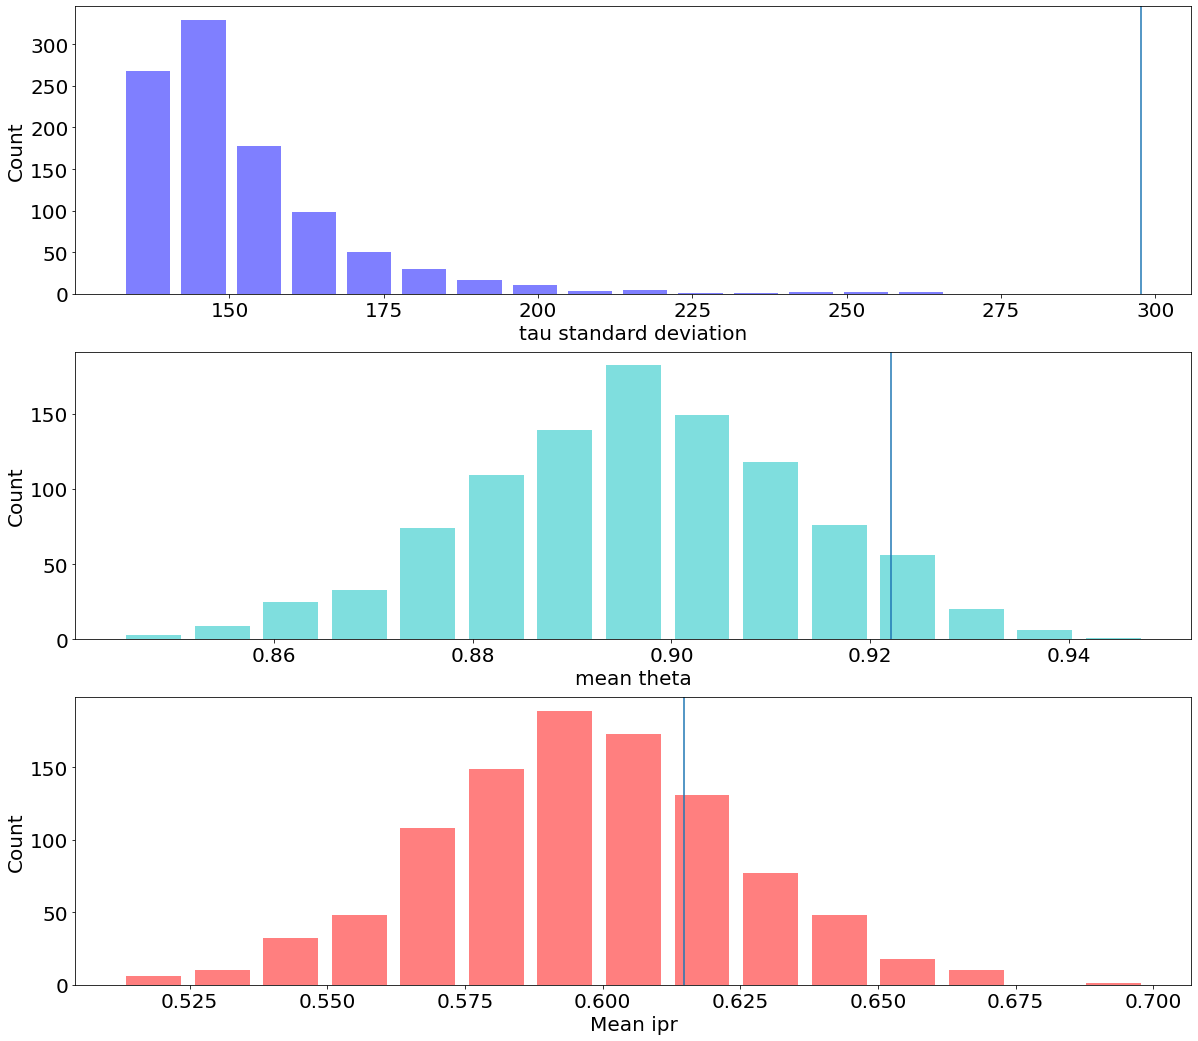

In [8]:
tc.role_of_connection_by_shuffling_FLN(p.copy(),MACAQUE_CASE=MACAQUE_CASE,LINEAR_HIER=0,SHUFFLE_TYPE=0, n_trial=1000
                                       , theta_FLAG=1)
TCP.save_fig('Figures/4D')

# Figure 4E(?) Detailed inspection of shufflign FLN

SHUFFLE_TYPE==0:  all elements are randomly permuted
SHUFFLE_FLN 

CONSENSUS_CASE=0
No STRONG GBA
(-0.0010339260485427073+0j)


Text(0.5, 1.0, 'Shuffle FLN')

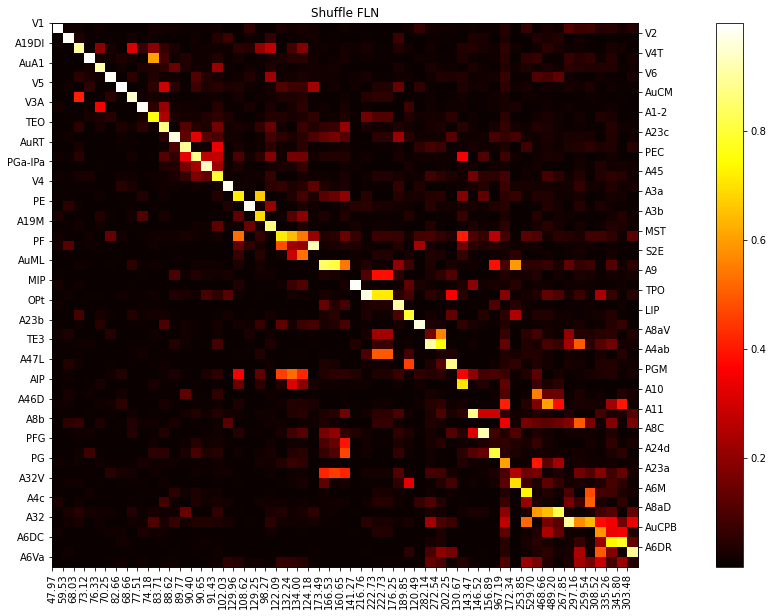

In [53]:
np.random.seed(10)
p_shuffle,W_shuffle = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=1,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=41)

p_shuffle['dist_mat'] = dist_mat
p_shuffle['full_dist_mat'] = full_dist_mat

max_eigval,_=pf.unstability_detection(p_shuffle,p_shuffle['fln_mat'])
print(max_eigval)

ipr_eigenvecs_shuffle, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_shuffle, eigVecs_slow_normed_shuffle, theta_eigenvecs_shuffle \
= tc.time_constant_module_shuffle_fln(p_shuffle.copy(),p_shuffle['fln_mat'].copy(), theta_flag=1)

eigVecs_cut = np.abs(eigVecs_slow_normed_shuffle)
max_ele = np.argmax(eigVecs_cut, axis=0)
sort_ind = np.argsort(max_ele)

# Break E-I balance
fig, ax = plt.subplots(1, 1,figsize=(14, 10), facecolor=(1, 1, 1))
tc.plot_eigenvalues(p_shuffle,eigVals_slow_shuffle[sort_ind], eigVecs_slow_normed_shuffle[:,sort_ind], fig, ax,flag_sort=1)
ax.set_title('Shuffle FLN')
# TCP.save_fig('Figures/4_Supp_Shuffle')

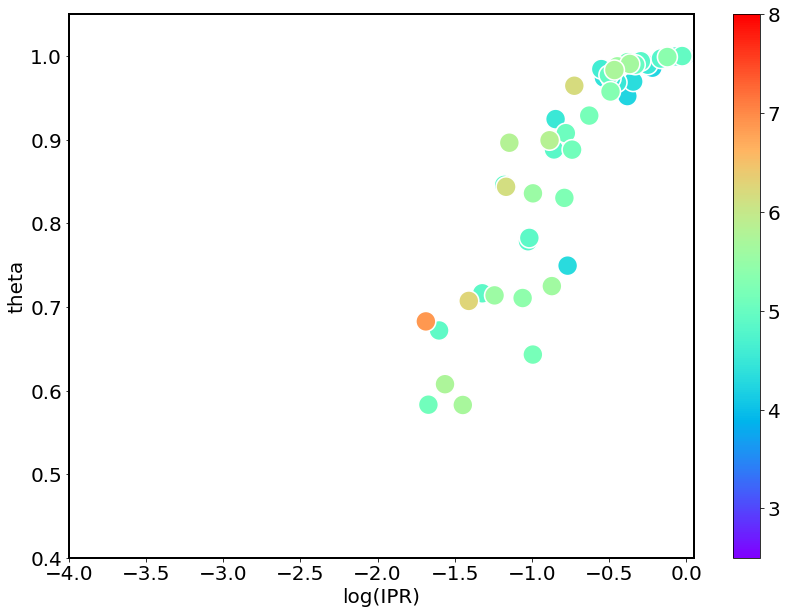

In [54]:
TCP.plot_IPR_theta(ipr_eigenvecs_shuffle, theta_eigenvecs_shuffle, eigVals_slow_shuffle, flag_norm=1, norm_lim=[2.5,8])
TCP.save_fig('Figures/4_Supp_IPR_Theta_shuffle')

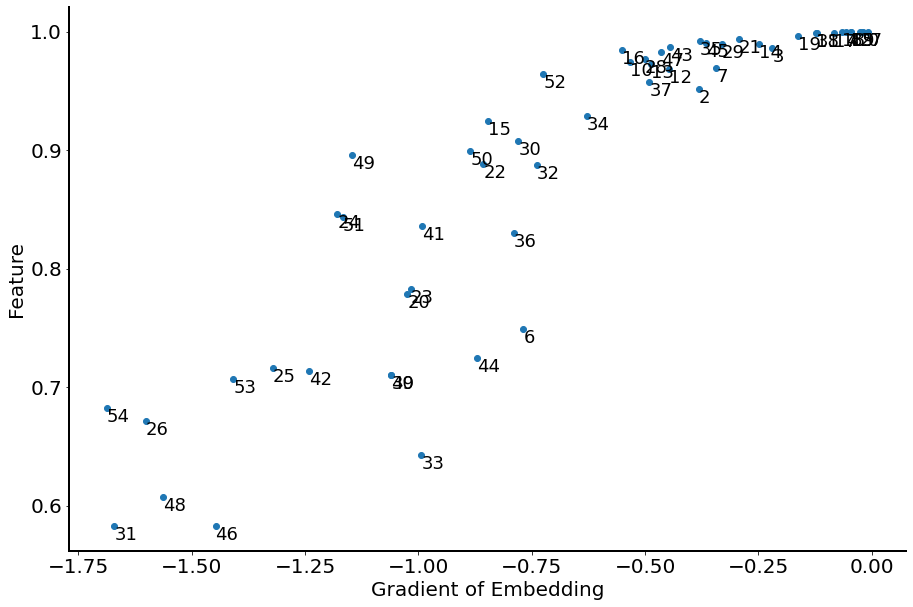

In [55]:
fig = TCP.plot_tau_feature(theta_eigenvecs_shuffle, np.log(ipr_eigenvecs_shuffle), np.arange(p_ori['n_area']),annotate_flag=True, p_fit=False)

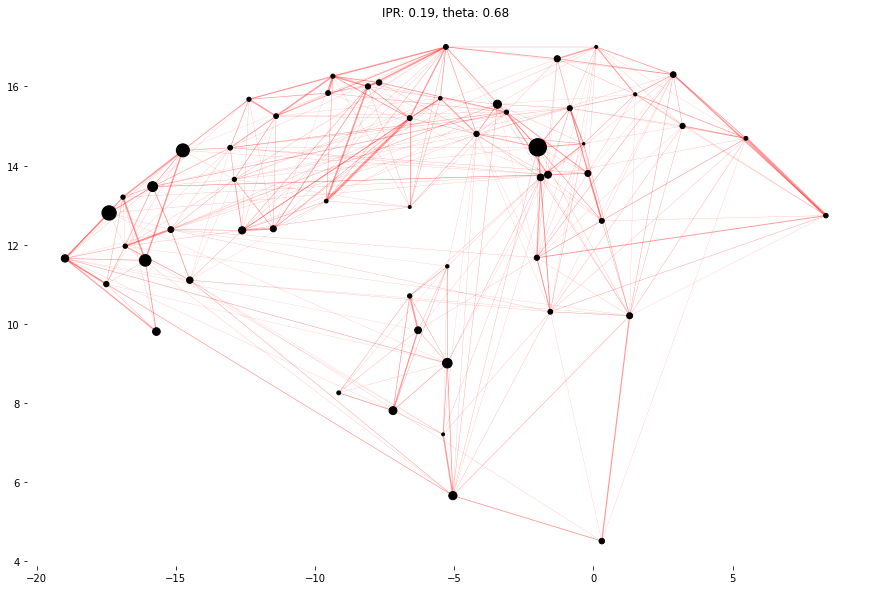

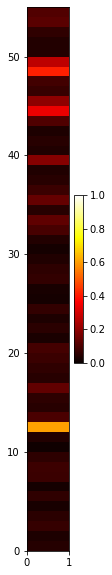

In [56]:
eigVecs_cut_shuffle = np.abs(eigVecs_slow_normed_shuffle)
plot_eigenmode_with_brain(eigVecs_cut_shuffle, ipr_eigenvecs_shuffle, theta_eigenvecs_shuffle, 54, name='Figures/4_Supp_IPR_Theta_illu_shuffle',k=1)

# TEMP

In [15]:
p = pf.load_data(datafile)
p_ori,W_ori = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)

p_break_hi,W_break_hi = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=1,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4, ZERO_HIER=0)

p_break_EI,W_break_EI = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=1,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=0, BREAK_EI=1)

p_enhance_hi,W_enhance_hi = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=1,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4, enhance_hi=0)


Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
IDENTICAL_HIER 

CONSENSUS_CASE=0
No STRONG GBA
CONSENSUS_CASE=0
STRONG_GBA 

LINEAR_HIER 

CONSENSUS_CASE=0
No STRONG GBA


In [16]:
p_break_hi

{'fln_mat': array([[0.00000000e+00, 4.97665067e-01, 3.05655572e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.05472890e-01, 0.00000000e+00, 4.61205695e-02, ...,
         0.00000000e+00, 0.00000000e+00, 6.47169172e-05],
        [6.86106346e-03, 3.16268637e-01, 0.00000000e+00, ...,
         9.23604697e-04, 1.05554823e-03, 5.80551524e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 7.27983798e-02, 3.69134178e-03],
        [0.00000000e+00, 1.48274229e-03, 1.03356702e-03, ...,
         1.35723105e-01, 0.00000000e+00, 1.19598202e-02],
        [0.00000000e+00, 2.22646310e-04, 0.00000000e+00, ...,
         3.21447977e-02, 3.19226318e-03, 0.00000000e+00]]),
 'sln_mat': array([[0.        , 0.46779627, 0.23296355, ..., 0.        , 0.        ,
         0.        ],
        [0.92939805, 0.        , 0.44682676, ..., 0.        , 0.        ,
         0.25      ],
        [0.98076923, 0.7780559 , 0.        , ..., 0

In [17]:
pf.unstability_detection(p_break_hi, p_break_hi['fln_mat'])

((-0.005065482572733853+0j),
 array([[ 6.81259970e-02, -6.50100000e-02,  1.62919718e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.18330472e-01, -5.38750000e-01,  1.32730267e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.98212571e-01,  0.00000000e+00,  6.81259970e-02, ...,
          0.00000000e+00,  2.11862608e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  3.95456286e-03, ...,
         -5.38750000e-01,  3.18975597e-02,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  7.28873223e-05, ...,
          0.00000000e+00,  6.81259970e-02, -6.50100000e-02],
        [ 0.00000000e+00,  0.00000000e+00,  5.93811101e-04, ...,
          0.00000000e+00,  6.18330472e-01, -5.38750000e-01]]))

Text(0.5, 1.0, 'Enhance Gradient')

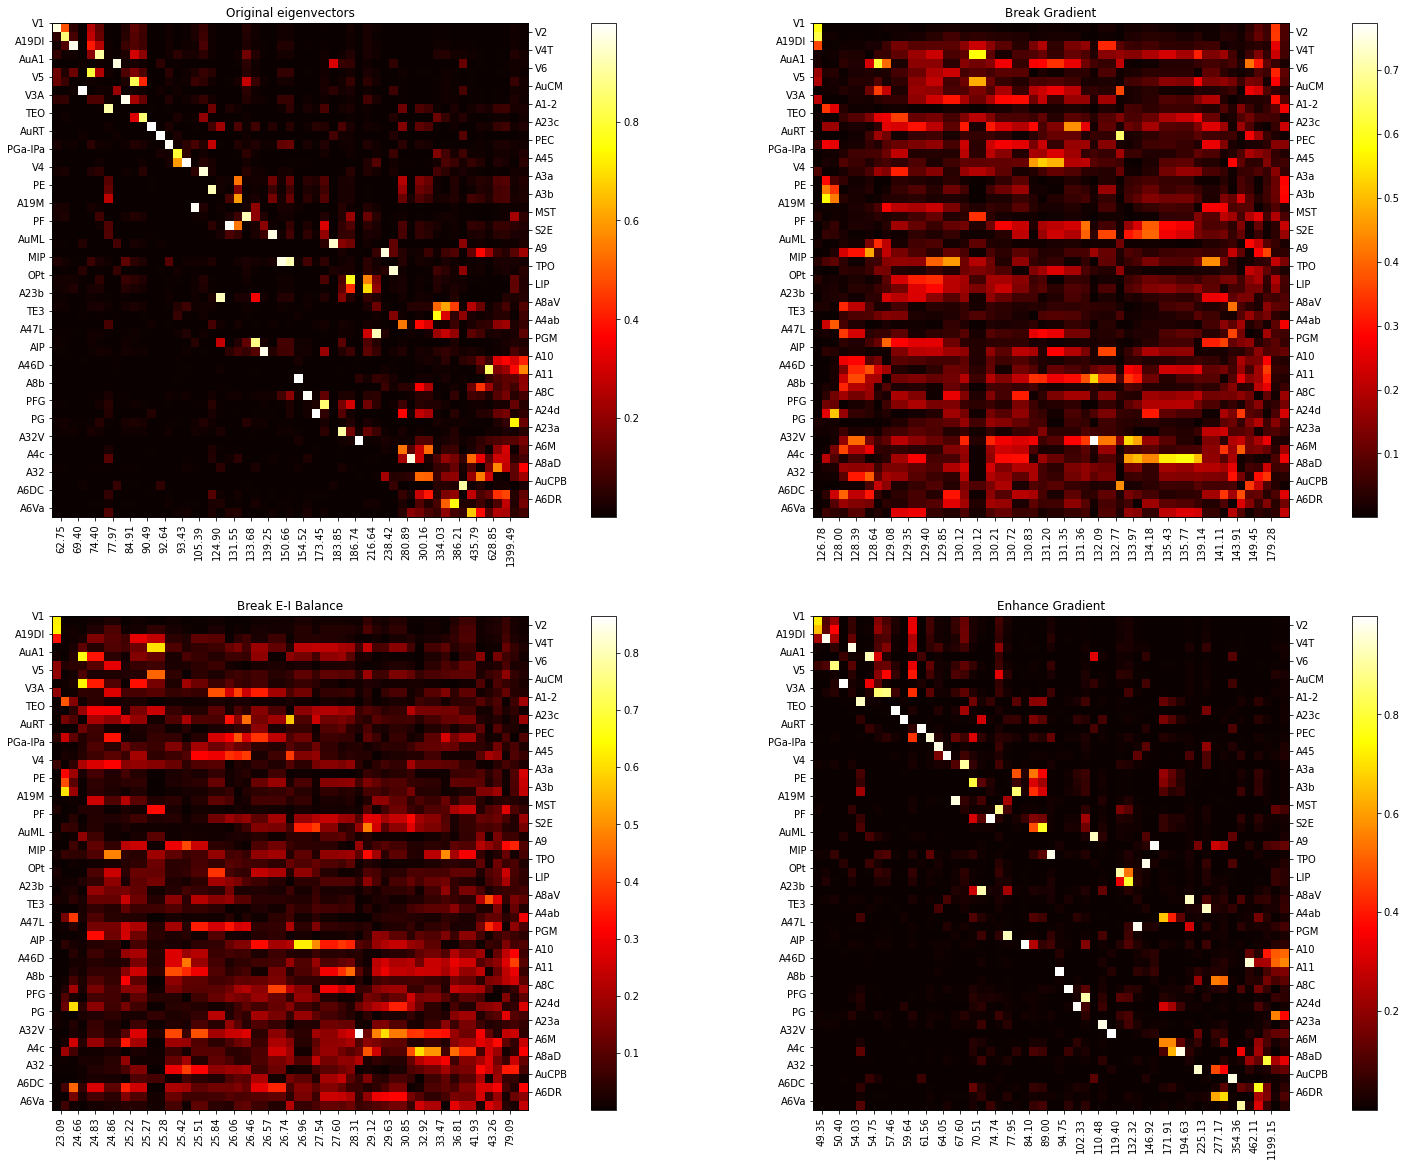

In [18]:
ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow, eigVecs_slow_normed \
= tc.time_constant_module_shuffle_fln(p_ori.copy(),p_ori['fln_mat'].copy())

ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_break_hi, eigVecs_slow_normed_break_hi \
= tc.time_constant_module_shuffle_fln(p_break_hi.copy(),p_break_hi['fln_mat'].copy())

ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_break_EI, eigVecs_slow_normed_break_EI \
= tc.time_constant_module_shuffle_fln(p_break_EI.copy(),p_break_EI['fln_mat'].copy())

ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow_enhance_hi, eigVecs_slow_normed_enhance_hi \
= tc.time_constant_module_shuffle_fln(p_enhance_hi.copy(),p_enhance_hi['fln_mat'].copy())

## Figure 7 (Eigenvector Localization)
fig, ax = plt.subplots(2,2,figsize=(25, 20))
# f1=ax[0].imshow(np.abs(eigVecs_reorder),cmap='hot')
# fig.colorbar(f1,ax=ax[0],pad=0.1)
# ax[0].set_title('eigenvector visualization')

tc.plot_eigenvalues(p_ori, eigVals_slow, eigVecs_slow_normed, fig, ax[0,0])
ax[0,0].set_title('Original eigenvectors')

# Break gradient
tc.plot_eigenvalues(p_break_hi,eigVals_slow_break_hi, eigVecs_slow_normed_break_hi, fig, ax[0,1])
ax[0,1].set_title('Break Gradient')

# Break E-I gradient
tc.plot_eigenvalues(p_break_EI,eigVals_slow_break_EI, eigVecs_slow_normed_break_EI, fig, ax[1,0])
ax[1,0].set_title('Break E-I Balance')

# Enhance local gradient
tc.plot_eigenvalues(p_enhance_hi,eigVals_slow_enhance_hi, eigVecs_slow_normed_enhance_hi, fig, ax[1,1])
ax[1,1].set_title('Enhance Gradient')

In [19]:
p_backbone_fln,W_backbone_fln = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4, enhance_hi=0, DELETE_WEAK_FLN=1)

CONSENSUS_CASE=0
No STRONG GBA


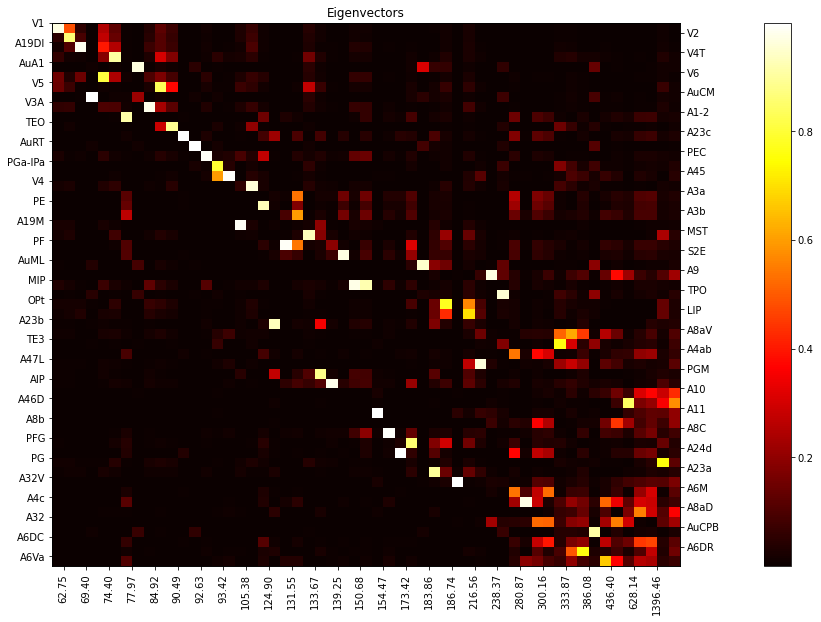

In [20]:
pf.unstability_detection(p_backbone_fln, p_backbone_fln['fln_mat'])

ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow, eigVecs_slow_normed_backbone_fln \
= tc.time_constant_module_shuffle_fln(p_backbone_fln.copy(),p_backbone_fln['fln_mat'].copy())

fig,ax = plt.subplots(1,1,figsize=(15,10))
tc.plot_eigenvalues(p_backbone_fln, eigVals_slow, eigVecs_slow_normed_backbone_fln, fig, ax)

55


Text(0.5, 1.0, 'Symmetric FLN')

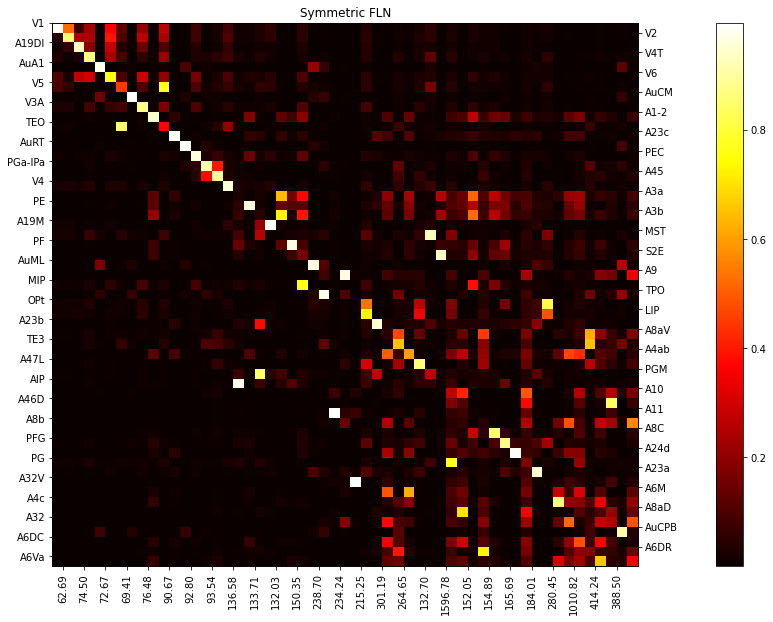

In [21]:
fln_symmetric = (p_ori['fln_mat'].copy() + (p_ori['fln_mat'].copy()).T) / 2 * 0.985
ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow, eigVecs_slow_normed_symmetric_fln \
= tc.time_constant_module_shuffle_fln(p_ori.copy(), fln_symmetric)

sort_ind = np.argsort(p_ori['hier_vals'])
# sort_ind = np.argsort(sort_ind)
# sort_ind = np.zeros(p['n_area'])
eig_re = eigVecs_slow_normed_symmetric_fln.copy()
eigval_re = eigVals_slow.copy()
for i in range(p['n_area']):
    # sort_ind[i] = np.argmax(np.abs(eigVecs_slow_normed_symmetric_fln[:, i]))
    eig_re[:, sort_ind[i]] = eigVecs_slow_normed_symmetric_fln[:, i]
    eigval_re[sort_ind[i]] = eigVals_slow[i]
print(len(np.unique(sort_ind)))
fig, ax = plt.subplots(1, figsize=(14, 10))
tc.plot_eigenvalues(p_ori,eigval_re, eig_re, fig, ax)
ax.set_title('Symmetric FLN')

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
inv_cond= 295.75782451607154
Start exp fitting!


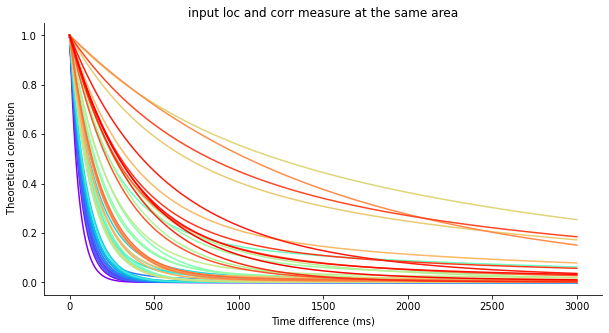

In [22]:
p = pf.load_data(datafile)
p,W = pf.genetate_net_connectivity(p,LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)

W_EI_ori = tc.generate_W_EI_shuffle_fln(p.copy(), p['fln_mat'].copy())
eigVals_ori, eigVecs_ori = np.linalg.eig(W_EI_ori)
    
coef_ori, delay_time_ori, acf_data_ori, tau_s_ori = tc.theoretical_time_constant_input_at_all_areas(p.copy(), eigVecs_ori,eigVals_ori, int(3e3), 1)
 